# Ibrahim Onoriode Khalil : Capstone Regression Project

## Business Understanding

The JK Group Real Estate intends to develop housing units for middle class residents, in a bid to maximize profit, the management of the company has launched an inquiry into what may be the factors that can increase the sale price of houses, without making them too pricey for the middle class people to afford. This analysis is done to help identify the different features which can affect the sale price of houses, using data collected from houses sold between 2021-2022 in King County, Washington as a case study.

## Data Understanding

The dataset contains information about houses sold in from King County, Washington, between the years 2021-2022. Contained in the data are historic/current details about each house sold, the price at which each house was sold, specific location and other unique features of each house. Each unique information were categorized and are identifiable by the respective column names while each house was designated a unique number ('id') for identification purposes.

## Data Preparation

### Loading The Data

Import necessary Libraries

In [104]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [105]:
base_kc = pd.read_csv('data/kc_house_data.csv')
base_kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


## Data Exploration

Use different pandas functions to check out the make up of the dataframe

In [106]:
base_kc.columns    # displays the names of columns contained in the dataframe

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [107]:
base_kc.shape    # displays the number of rows and columns, separated by a ','

(30155, 25)

In [108]:
base_kc.dtypes    # displays the data type contained in each column

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
address           object
lat              float64
long             float64
dtype: object

In [109]:
base_kc.info()    # displays the column names, number of values in each column that is not a null
                # value and the 'dtype' of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [110]:
base_kc.describe()     # displays different statistacal values of the
                       # different columns in the dataframe which contain numeric data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


### Preliminary Data Cleaning

From the pd.info() function above, we can see that there are some missing values in the 'heat_source' and 'sewer_system' columns.

Next we check for the exact number of missing values as well as the percentage of the data that is missing(this will determine the cleaning technique to be employed in handling the missing data).

In [111]:
base_kc.isna().sum()    # displays the total number of null values in each column

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [112]:
base_kc.isna().sum()/base_kc.shape[0]    # displays the propoertion of each column that contains missing values

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001061
sewer_system     0.000464
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
dtype: float64

In both columns, less than 1% (0.1% in 'heat_source' column and 0.05% in 'sewer_system' column) have missing values.

To handle the missing values, take out the rows which contain missing values.

In [113]:
base_kc.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)    # drops every row containing missing values
base_kc.isna().sum()/base_kc.shape[0]     # displays the propoertion of each column that contains missing values

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
dtype: float64

In [114]:
base_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [115]:
base_kc.shape    # displays the number of rows and columns, separated by a ','

(30111, 25)

The 'column_names.md' file informs us that the 'date' column represents the date of sales for each house. For clarity, rename the 'date' column to 'sale_date'

In [116]:
rename_date = {'date': 'sale_date'}
base_kc.rename(columns=rename_date, inplace=True)
base_kc.head(3)

,id,sale_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520


## Modeling

### Baseline Model

First create the baseline model predictor dataframe and a target

In [117]:
num_kc = base_kc.select_dtypes('number')
num_kc

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
0,7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052
1,8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591
2,1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520
3,1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020
4,8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,210,1921,0,47.664740,-122.32940
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,520,2011,0,47.565610,-122.38851
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,940,920,240,110,1995,0,47.610395,-122.29585
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,1830,740,480,100,2006,0,47.449490,-122.18908


In [118]:
base_kc.columns

Index(['id', 'sale_date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [119]:
num_kc.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'lat', 'long'],
      dtype='object')

In [120]:
num_cols = [x for x in num_kc.columns if x not in ['id', 'price', 'yr_built', 'yr_renovated', 'lat', 'long']]
num_cols 

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio']

In [121]:
preds  = base_kc[num_cols]
target = base_kc.price

In [122]:
y = target
X_baseline = preds

In [123]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     2278.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:10:19   Log-Likelihood:            -4.4762e+05
No. Observations:               30111   AIC:                         8.953e+05
Df Residuals:                   30101   BIC:                         8.953e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const              2e+05   1.79e+04     11.164      0.000    1.65e+05    2.35e+05
bedrooms      -1.612e+05   5478.123    -29.427      0.000   -1.72e+05    -1.5e+05
bathrooms      1.058e+05   7804.263     13.552      0.000    9.05e+04    1.21e+05
sqft_living     294.7012     18.295     16.109      0.000     258.843     330.559
sqft_lot         -0.0853      0.068     -1.249      0.212      -0.219       0.049
floors        -7.426e+04   8826.962     -8.413      0.000   -9.16e+04    -5.7e+04
sqft_above      352.6494     18.436     19.128      0.000     316.513     388.786
sqft_basement   231.9267     13.283     17.461      0.000     205.892     257.961
sqft_garage    -307.3629     17.433    -17.631      0.000    -341.533    -273.193
sqft_patio      268.2115     18.047     14.861      0.000     232.838     303.585
==============================================================================
Omnibus:                    42748.615   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45720135.727
Skew:                           7.950   Prob(JB):                         0.00
Kurtosis:                     193.233   Cond. No.                     2.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the summary above, we can see that the regression line we found for the second model was:

price =200000 − 161200bedrooms + 105800bathrooms + 295sqft_living − 0.09sqft_lot - 74260floors + 353sqft_above + 232sqft_basement - 307sqft_garage + 268sqft_patio

The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 41% of the variance in price, so as expected, other variables also affect the price at which a house is sold for.

Only some of the model coefficients are statistically significant, const, bedrooms, bathrooms, sqft_living, sqft_above, sqft_basement, sqft_garage, sqft_patio, and floors have p-values below 0.05 and are therefore statistically significant.

sqft_lot has p-value above 0.05. This means that there is greater than a 1 in 20 chance that their true coefficients are 0 (i.e. they have no effect on price), and are thus not statistically significant at an alpha of 0.05.

Seeing that the model only accounts for 40.5% of variations in price, is an indication that the model is not the best possible. To improve on the model, the categorical data will be added as well as some data cleaning to help refine the data some more.

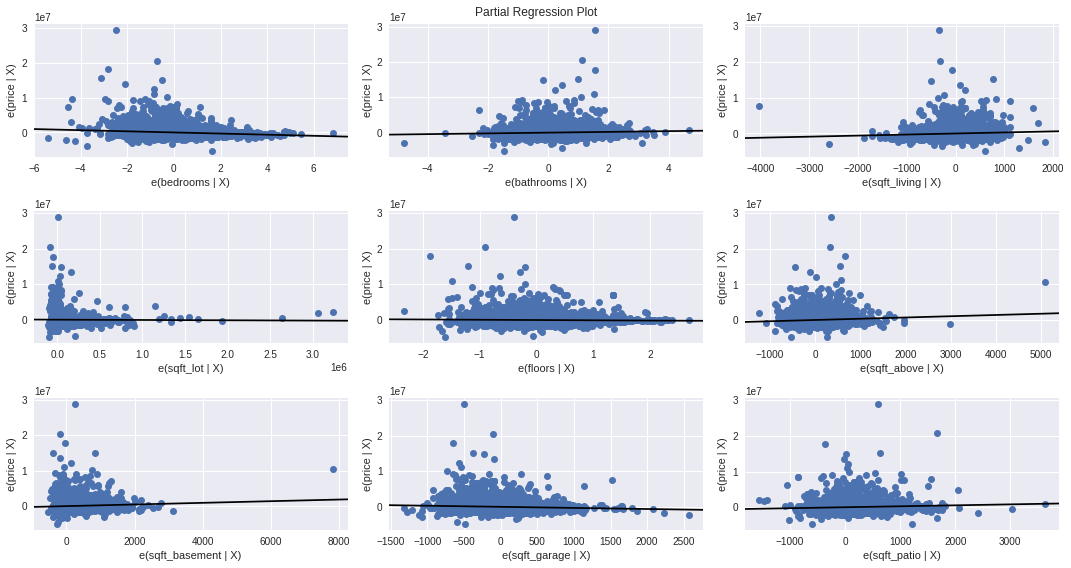

In [124]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    baseline_results,
    exog_idx=list(X_baseline.columns.values),
    grid=(3,3),
    fig=fig)
plt.show()

In [125]:
baseline_mae = baseline_results.resid.abs().sum() / len(y)
baseline_mae

384671.3061567922

The model has a mean absolute error of 413540, which implies that every prediction of our model is off by $413540

<AxesSubplot:>

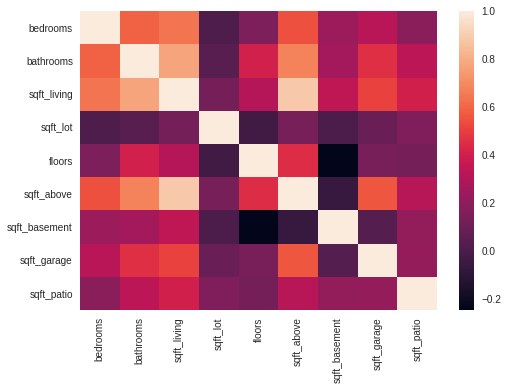

In [126]:
import seaborn as sns
sns.heatmap(X_baseline.corr())

In [127]:
base_kc.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034096,-0.007065,-0.012382,-0.028234,-0.119276,0.031941,-0.023340,-0.015077,-0.008044,-0.041644,0.023076,-0.028858,-0.000764,0.000638
price,-0.034096,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.538631,0.245005,0.263674,0.313789,0.095796,0.085023,0.063430,-0.022278
bedrooms,-0.007065,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.546221,0.237957,0.318110,0.183660,0.145497,0.015369,0.108883,-0.106791
bathrooms,-0.012382,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.674239,0.260684,0.456264,0.327982,0.443379,0.041574,-0.005481,0.017684
sqft_living,-0.028234,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.883733,0.338387,0.510967,0.396530,0.291242,0.039089,0.102205,-0.087625
sqft_lot,-0.119276,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.131756,0.004457,0.089318,0.154575,0.001897,0.009390,0.030041,-0.034408
floors,0.031941,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.448245,-0.248466,0.132363,0.125016,0.544314,-0.025041,-0.218174,0.233589
sqft_above,-0.023340,0.538631,0.546221,0.674239,0.883733,0.131756,0.448245,1.000000,-0.067306,0.559972,0.312593,0.387253,0.011036,0.092317,-0.082722
sqft_basement,-0.015077,0.245005,0.237957,0.260684,0.338387,0.004457,-0.248466,-0.067306,1.000000,0.025766,0.210305,-0.230783,0.054032,0.059664,-0.045104
sqft_garage,-0.008044,0.263674,0.318110,0.456264,0.510967,0.089318,0.132363,0.559972,0.025766,1.000000,0.216512,0.447720,-0.098301,0.092092,-0.096639


From the above function, it can be seen that 'sqft_living' has a high correlation(above 0.75) with both 'bathrooms' and 'sqft_above', hence there is multicolinearity amongst the predictors.

Create a new model without the 'sqft_living' feature.

Also, 'sqft_lot' has a p-value higher than 0.05 

In [128]:
num_cols_2 = [x for x in num_kc.columns if x not in ['id', 'sqft_living', 'price',
                                                     'yr_built', 'sqft_lot', 'yr_renovated', 'lat', 'long']]
num_cols 

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio']

In [129]:
preds_2  = base_kc[num_cols_2]
target = base_kc.price

In [130]:
y = target
X_baseline_2 = preds_2

In [131]:
second_model = sm.OLS(y, sm.add_constant(X_baseline_2))
second_results = second_model.fit()

second_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     2867.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:10:21   Log-Likelihood:            -4.4774e+05
No. Observations:               30111   AIC:                         8.955e+05
Df Residuals:                   30103   BIC:                         8.956e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.483e+05   1.76e+04      8.420      0.000    1.14e+05    1.83e+05
bedrooms      -1.475e+05   5424.850    -27.197      0.000   -1.58e+05   -1.37e+05
bathrooms      1.453e+05   7440.643     19.522      0.000    1.31e+05     1.6e+05
floors        -9.215e+04   8750.441    -10.531      0.000   -1.09e+05    -7.5e+04
sqft_above      620.6902      7.759     79.996      0.000     605.482     635.898
sqft_basement   398.3727      8.380     47.536      0.000     381.947     414.799
sqft_garage    -338.2611     17.402    -19.438      0.000    -372.369    -304.153
sqft_patio      302.2230     17.846     16.935      0.000     267.243     337.203
==============================================================================
Omnibus:                    42442.691   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         43475073.322
Skew:                           7.848   Prob(JB):                         0.00
Kurtosis:                     188.487   Cond. No.                     9.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the summary above, we can see that the regression line we found for the second model was:

price =48800 − 139100bedrooms + 119000bathrooms - 92150floors + 621sqft_above + 298sqft_basement - 338sqft_garage + 302sqft_patio

The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 40% of the variance in price of houses in King County, so as expected, other variables also affect the price at which a house is sold for.

The fact that the R-Squared is 41% is not an indicator that this is not a very good model, it only indicates that there are other features which affect the price of houses which have not been included in the model.

All the model coefficients are statistically significant, with p-values below 0.05 and are therefore statistically significant.

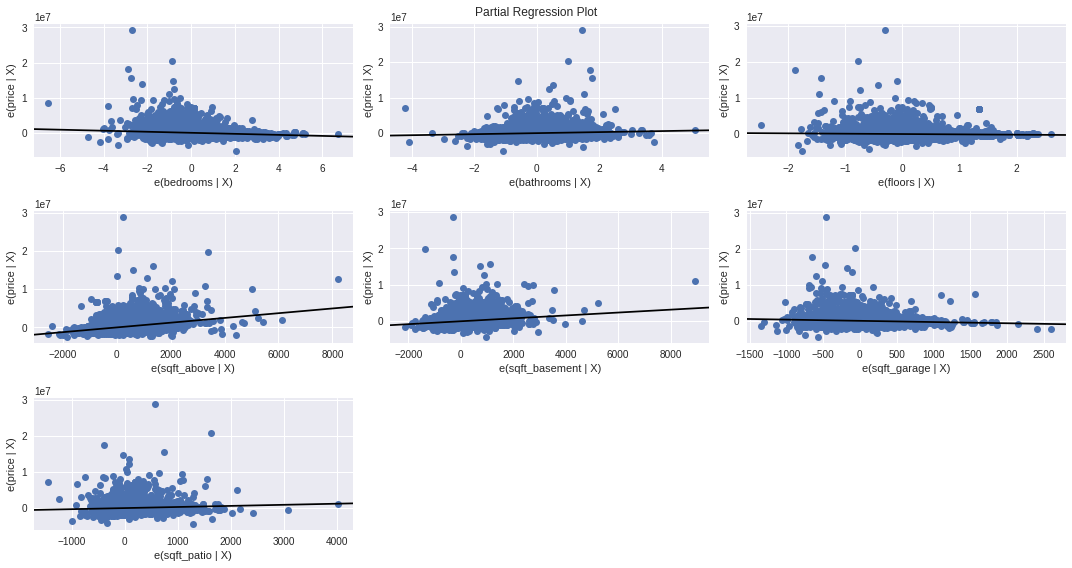

In [132]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    second_results,
    exog_idx=list(X_baseline_2.columns.values),
    grid=(3,3),
    fig=fig)
plt.show()

In [133]:
second_mae = second_results.resid.abs().sum() / len(y)
second_mae

388542.7272322692

<AxesSubplot:>

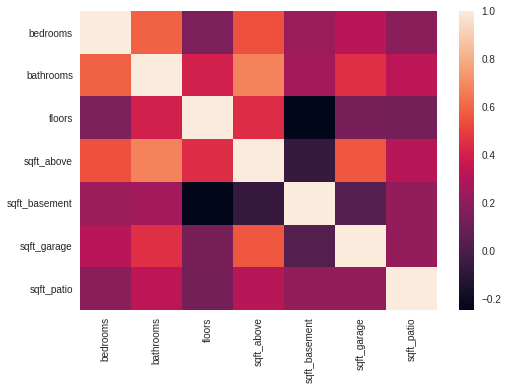

In [134]:
import seaborn as sns
sns.heatmap(X_baseline_2.corr())

In [135]:
X_baseline_2.corr()

,bedrooms,bathrooms,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio
bedrooms,1.000000,0.588035,0.146871,0.546221,0.237957,0.318110,0.183660
bathrooms,0.588035,1.000000,0.404291,0.674239,0.260684,0.456264,0.327982
floors,0.146871,0.404291,1.000000,0.448245,-0.248466,0.132363,0.125016
sqft_above,0.546221,0.674239,0.448245,1.000000,-0.067306,0.559972,0.312593
sqft_basement,0.237957,0.260684,-0.248466,-0.067306,1.000000,0.025766,0.210305
sqft_garage,0.318110,0.456264,0.132363,0.559972,0.025766,1.000000,0.216512
sqft_patio,0.183660,0.327982,0.125016,0.312593,0.210305,0.216512,1.000000


Create a new model without the 'sqft_above' and 'bathrooms' features.

This is to test if the 'sqft_living' feature has more effect on the 'price' than the 'sqft_above' and 'bathrooms' features put together

In [136]:
num_cols_3 = [x for x in num_kc.columns if x not in ['id', 'sqft_above', 'bathrooms', 'price',
                                                     'yr_built', 'sqft_lot', 'yr_renovated', 'lat', 'long']]
num_cols_3 

['bedrooms',
 'sqft_living',
 'floors',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio']

In [137]:
preds_3  = base_kc[num_cols_3]
target = base_kc.price

In [138]:
y = target
X_baseline_3 = preds_3

In [139]:
third_model = sm.OLS(y, sm.add_constant(X_baseline_3))
third_results = third_model.fit()

third_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     3282.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:10:22   Log-Likelihood:            -4.4786e+05
No. Observations:               30111   AIC:                         8.957e+05
Df Residuals:                   30104   BIC:                         8.958e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.305e+05   1.79e+04     12.893      0.000    1.95e+05    2.66e+05
bedrooms      -1.465e+05   5356.702    -27.353      0.000   -1.57e+05   -1.36e+05
sqft_living     648.4645      6.947     93.348      0.000     634.849     662.080
floors        -4861.4859   8141.988     -0.597      0.550   -2.08e+04    1.11e+04
sqft_basement    47.4589      8.231      5.766      0.000      31.326      63.592
sqft_garage    -191.2430     16.749    -11.418      0.000    -224.072    -158.414
sqft_patio      259.9280     18.027     14.419      0.000     224.594     295.262
==============================================================================
Omnibus:                    42857.356   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46229598.077
Skew:                           7.989   Prob(JB):                         0.00
Kurtosis:                     194.290   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

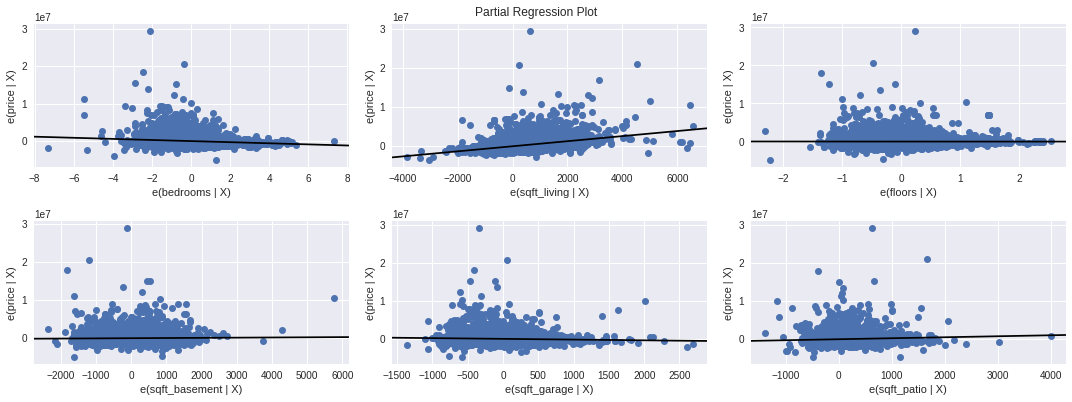

In [140]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    third_results,
    exog_idx=list(X_baseline_3.columns.values),
    grid=(3,3),
    fig=fig)
plt.show()

In [141]:
third_mae = third_results.resid.abs().sum() / len(y)
third_mae

385814.73688015837

Here, the mean absolute error increased from 413540 to 414769, which which implies that every prediction of the second model is off by $414769. This is not an improvement in performance, however, it is an indication that dropping the 'bathrooms' and sqft_above' columns, will be more advantageous to the model, than dropping the 'sqft_living' column.

<AxesSubplot:>

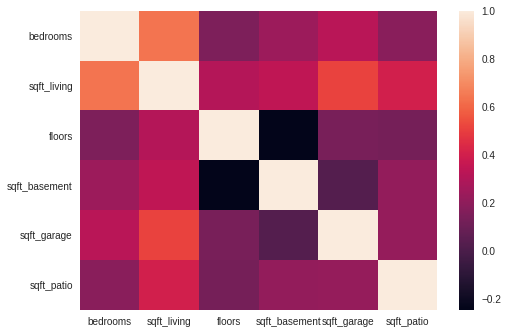

In [142]:
import seaborn as sns
sns.heatmap(X_baseline_3.corr())

In [143]:
X_baseline_3.corr()

,bedrooms,sqft_living,floors,sqft_basement,sqft_garage,sqft_patio
bedrooms,1.000000,0.637048,0.146871,0.237957,0.318110,0.183660
sqft_living,0.637048,1.000000,0.303911,0.338387,0.510967,0.396530
floors,0.146871,0.303911,1.000000,-0.248466,0.132363,0.125016
sqft_basement,0.237957,0.338387,-0.248466,1.000000,0.025766,0.210305
sqft_garage,0.318110,0.510967,0.132363,0.025766,1.000000,0.216512
sqft_patio,0.183660,0.396530,0.125016,0.210305,0.216512,1.000000


### Adding Categorical Data

In [144]:
# Take a look at the value_counts for our categorical variables and consider possible iterations.
base_kc[['waterfront','greenbelt','nuisance','view','condition','grade']].value_counts()

waterfront  greenbelt  nuisance  view     condition  grade        
NO          NO         NO        NONE     Average    8 Good           4863
                                                     7 Average        4448
                                          Good       7 Average        2931
                                          Average    9 Better         2083
                                          Good       8 Good           1447
                                                                      ... 
                       YES       AVERAGE  Poor       7 Average           1
                                                     6 Low Average       1
YES         NO         NO        AVERAGE  Very Good  9 Better            1
NO          NO         YES       AVERAGE  Poor       5 Fair              1
YES         YES        NO        AVERAGE  Good       12 Luxury           1
Length: 470, dtype: int64

In [145]:
# make a list of the categorical columns
cat_columns = ['waterfront', 'greenbelt', 'nuisance', 'view',
               'condition', 'grade', 'heat_source', 'sewer_system']

In [146]:
# use pd.get_dummies to dummify categorical variables
dummy_kc = pd.get_dummies(data=base_kc, columns=cat_columns, drop_first=True)

In [147]:
# view the new dummified columns
dummy_kc.columns

Index(['id', 'sale_date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long',
       'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

In [148]:
X_dummy=dummy_kc.drop(labels =['id', 'sqft_living','yr_built', 'sqft_lot',
                               'yr_renovated','lat', 'long', 'sale_date','price','address'], axis=1)
y=dummy_kc.price

In [149]:
X_dummy.dtypes

bedrooms                             int64
bathrooms                          float64
floors                             float64
sqft_above                           int64
sqft_basement                        int64
sqft_garage                          int64
sqft_patio                           int64
waterfront_YES                       uint8
greenbelt_YES                        uint8
nuisance_YES                         uint8
view_EXCELLENT                       uint8
view_FAIR                            uint8
view_GOOD                            uint8
view_NONE                            uint8
condition_Fair                       uint8
condition_Good                       uint8
condition_Poor                       uint8
condition_Very Good                  uint8
grade_11 Excellent                   uint8
grade_12 Luxury                      uint8
grade_13 Mansion                     uint8
grade_2 Substandard                  uint8
grade_3 Poor                         uint8
grade_4 Low

In [150]:
first_dummy_model = sm.OLS(y,sm.add_constant(X_dummy))
first_dummy_results = first_dummy_model.fit()
first_dummy_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     867.6
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:10:24   Log-Likelihood:            -4.4429e+05
No. Observations:               30111   AIC:                         8.887e+05
Df Residuals:                   30072   BIC:                         8.890e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.147e+06   3.65e+04     31.415      0.000    1.08e+06    1.22e+06
bedrooms                         -4.86e+04   5091.207     -9.545      0.000   -5.86e+04   -3.86e+04
bathrooms                         7.95e+04   6951.917     11.435      0.000    6.59e+04    9.31e+04
floors                          -1.068e+05   8770.226    -12.182      0.000   -1.24e+05   -8.96e+04
sqft_above                        331.3232      8.282     40.006      0.000     315.090     347.556
sqft_basement                     218.5045      8.109     26.945      0.000     202.610     234.399
sqft_garage                      -297.2470     16.484    -18.032      0.000    -329.557    -264.937
sqft_patio                        145.0812     16.654      8.712      0.000     112.439     177.724
waterfront_YES                   7.726e+05   3.31e+04     23.309      0.000    7.08e+05    8.38e+05
greenbelt_YES                    -1.77e+04   2.29e+04     -0.771      0.441   -6.27e+04    2.73e+04
nuisance_YES                     6.875e+04   9589.434      7.169      0.000       5e+04    8.75e+04
view_EXCELLENT                   6.362e+05   3.38e+04     18.842      0.000     5.7e+05    7.02e+05
view_FAIR                        1.811e+05   4.42e+04      4.100      0.000    9.45e+04    2.68e+05
view_GOOD                        8318.2094   2.54e+04      0.327      0.743   -4.15e+04    5.81e+04
view_NONE                       -5.799e+04   1.52e+04     -3.811      0.000   -8.78e+04   -2.82e+04
condition_Fair                  -5.609e+04   4.21e+04     -1.333      0.183   -1.39e+05    2.64e+04
condition_Good                   6.791e+04   8743.510      7.767      0.000    5.08e+04    8.51e+04
condition_Poor                  -7.975e+04   8.27e+04     -0.964      0.335   -2.42e+05    8.24e+04
condition_Very Good              1.442e+05   1.23e+04     11.688      0.000     1.2e+05    1.68e+05
grade_11 Excellent               8.101e+05   3.55e+04     22.801      0.000     7.4e+05     8.8e+05
grade_12 Luxury                  1.843e+06   6.01e+04     30.647      0.000    1.73e+06    1.96e+06
grade_13 Mansion                 3.262e+06   1.31e+05     24.877      0.000       3e+06    3.52e+06
grade_2 Substandard              -7.07e+05   6.26e+05     -1.130      0.259   -1.93e+06    5.19e+05
grade_3 Poor                    -1.101e+06   2.16e+05     -5.094      0.000   -1.52e+06   -6.77e+05
grade_4 Low                     -9.516e+05   9.62e+04     -9.896      0.000   -1.14e+06   -7.63e+05
grade_5 Fair                     -9.59e+05   4.02e+04    -23.848      0.000   -1.04e+06    -8.8e+05
grade_6 Low Average             -9.752e+05   2.63e+04    -37.029      0.000   -1.03e+06   -9.24e+05
grade_7 Average                 -9.194e+05   2.21e+04    -41.653      0.000   -9.63

The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 52% of the variance in price of houses in King County, so as expected, other variables also affect the price at which a house is sold for.

Most of the model coefficients are statistically significant, with p-values below 0.05 and are therefore statistically significant, however there is need for some data cleaning and engineering to help improve the performance of the model.

In [151]:
first_dummy_mae = first_dummy_results.resid.abs().sum() / len(y)
first_dummy_mae

341340.23079896724

Here, the mean absolute error decreased from 413540 to 341340, which which implies that every prediction of the first dummy model is off by $341340. This is an improvement in overall performance of the model.

<AxesSubplot:>

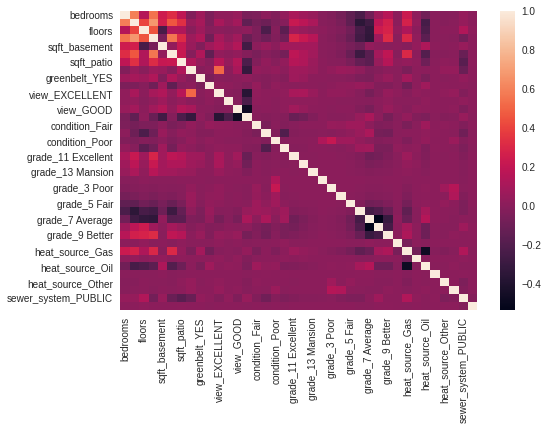

In [152]:
# lets check for multicollinearity (if predictor variables are highly correlated with other predictor variables)
import seaborn as sns
sns.heatmap(X_dummy.corr())

In [153]:
X_dummy.corr()

,bedrooms,bathrooms,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,waterfront_YES,greenbelt_YES,nuisance_YES,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
bedrooms,1.000000,0.588035,0.146871,0.546221,0.237957,0.318110,0.183660,-0.029699,0.065298,-0.049978,...,0.156576,0.001152,0.228732,0.014286,-0.091664,-0.007826,-0.018820,-0.013354,0.033922,0.002562
bathrooms,0.588035,1.000000,0.404291,0.674239,0.260684,0.456264,0.327982,0.043985,0.093870,-0.049927,...,0.258100,0.001854,0.271900,0.032530,-0.252576,-0.007600,-0.014822,-0.004870,0.034031,0.001846
floors,0.146871,0.404291,1.000000,0.448245,-0.248466,0.132363,0.125016,-0.004181,0.065286,-0.016244,...,0.275449,0.026365,0.120942,0.001533,-0.221423,-0.005958,-0.001975,-0.000987,0.133260,0.013886
sqft_above,0.546221,0.674239,0.448245,1.000000,-0.067306,0.559972,0.312593,0.058461,0.135389,-0.093457,...,0.312175,-0.008119,0.291672,0.016159,-0.168613,-0.006177,-0.003596,-0.010372,-0.081848,0.002592
sqft_basement,0.237957,0.260684,-0.248466,-0.067306,1.000000,0.025766,0.210305,0.045715,-0.033851,0.072740,...,-0.004654,-0.002454,-0.015723,0.031675,0.120436,0.005733,-0.003918,-0.001659,0.044760,-0.002266
sqft_garage,0.318110,0.456264,0.132363,0.559972,0.025766,1.000000,0.216512,-0.016775,0.128109,-0.147451,...,0.185548,-0.010929,0.302288,0.003343,-0.198317,-0.010710,-0.009021,-0.007238,-0.122329,-0.000017
sqft_patio,0.183660,0.327982,0.125016,0.312593,0.210305,0.216512,1.000000,0.132170,0.035989,-0.013914,...,0.151001,0.010221,0.032665,0.014081,-0.100851,-0.005284,0.009748,0.005283,-0.182082,0.005936
waterfront_YES,-0.029699,0.043985,-0.004181,0.058461,0.045715,-0.016775,0.132170,1.000000,-0.019686,0.008080,...,-0.001204,-0.005822,-0.052614,0.006588,-0.000172,-0.001514,0.036533,0.038217,-0.122415,-0.001312
greenbelt_YES,0.065298,0.093870,0.065286,0.135389,-0.033851,0.128109,0.035989,-0.019686,1.000000,-0.052934,...,0.041408,-0.007187,0.087388,0.006118,-0.051521,-0.001870,-0.004182,-0.002090,0.025340,-0.001619
nuisance_YES,-0.049978,-0.049927,-0.016244,-0.093457,0.072740,-0.147451,-0.013914,0.008080,-0.052934,1.000000,...,-0.036393,-0.004523,-0.090486,0.004398,0.072601,0.002299,0.005143,0.000872,0.003800,-0.004587


## Data Cleaning

#### Age column

From the 'sale_date', 'yr_built' and 'yr_renovated' columns, create a new column, 'age', to represent how old each house was at the time it was sold.

Note that a renovated house is as good as new, the age of renovated houses will be calculated from the year they were renovated, while for houses that weren't renovated, it will be calculated from the year they were built.

In [154]:
base_kc.dtypes #note that the data type of the 'sale_date' column is an object type. 

id                 int64
sale_date         object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
address           object
lat              float64
long             float64
dtype: object

In [155]:
#convert the 'sale_date' column from object type to a datetime

base_kc.sale_date = base_kc.sale_date.apply(lambda x: pd.to_datetime(x, yearfirst=True))
base_kc.dtypes

id                        int64
sale_date        datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
greenbelt                object
nuisance                 object
view                     object
condition                object
grade                    object
heat_source              object
sewer_system             object
sqft_above                int64
sqft_basement             int64
sqft_garage               int64
sqft_patio                int64
yr_built                  int64
yr_renovated              int64
address                  object
lat                     float64
long                    float64
dtype: object

In [156]:
base_kc.head(3)

,id,sale_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520


In [157]:
# if yr_renovated is not equal to 0, subtract year renovated from year sold, else, subtract year built from year sold

base_kc['age'] = np.where(base_kc['yr_renovated'] != 0,
                             base_kc.sale_date.apply(lambda x: x.year) - base_kc['yr_renovated'], 
                            base_kc.sale_date.apply(lambda x: x.year) - base_kc['yr_built'])
base_kc.head(3)

,id,sale_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,age
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65


In [158]:
base_kc['age'].unique()

array([ 53,  71,  65,  11,   9,  73,  70,   3,  33,  10, 110,  46,   0,
         6,  16,  78,  15,   1, 111,  32,  80,  29,  68, 116,  57,   5,
        61,  36,  35,  26,  14,  41,  43,  55,  93,  74,  52,  62,  88,
        66,  54,  63,  64,  12,  60,  23,  59, 121,  58,  37,  56,  -1,
        21, 120,  44,  27, 109,  17,  85, 108,  72,  31,  19,  18,   2,
        75,  13,  22,  49,  76,  34,  69,  45,  51,  97,   4,   8,  24,
        98,  47,  38, 113,  81, 107, 114,  42,  96,  83, 106,  50,  94,
         7,  25,  40,  20, 104,  79,  77,  30,  39, 102,  90,  95,  28,
       117,  67,  92,  91, 100, 103,  48, 119, 122,  84, 112,  89,  99,
        86,  87, 101,  82, 115, 105, 118])

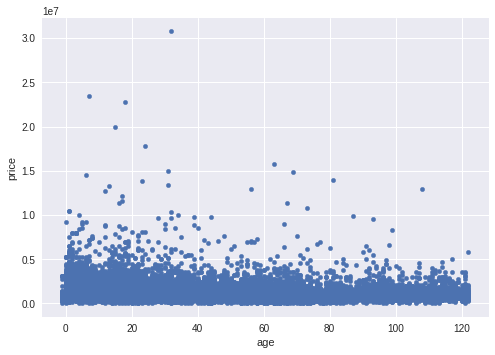

In [159]:
base_kc.plot.scatter(x='age', y='price');

#### Zipcode column

From the address column, create a new column 'zipcode' which will contain only the zipcodes of all the houses in the dataset.

In [160]:
base_kc.address[0:5]

0    2102 Southeast 21st Court, Renton, Washington ...
1    11231 Greenwood Avenue North, Seattle, Washing...
2    8504 South 113th Street, Seattle, Washington 9...
3    4079 Letitia Avenue South, Seattle, Washington...
4    2193 Northwest Talus Drive, Issaquah, Washingt...
Name: address, dtype: object

In [161]:
base_kc['address'].iloc[0].split(', ')[2].split()[1]

'98055'

In [162]:
base_kc['zipcode'] =  base_kc['address'].apply(lambda x: x.split(', ')[2].split()[-1])
base_kc['zipcode']

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zipcode, Length: 30111, dtype: object

In [163]:
base_kc.head(3)

,id,sale_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,age,zipcode
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,98055
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,98133
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,98178


#### Removing zipcode Outliers

The 'column_names.md' file informs us that there are some addresses that are not within King County. 

To ensure that we only work with addresses within King County, we have to remove all homes that have an address outside King County.

In [164]:
base_kc['zipcode'].nunique()

400

Next, we will scrape city names from https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm website and use them to filter the homes in the DataFrame.

In [165]:
from bs4 import BeautifulSoup
import requests

In [166]:
resp = requests.get('https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm')
resp.status_code

200

In [167]:
soup = BeautifulSoup(resp.content)
soup

<!DOCTYPE html>
<html><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<script data-cfasync="false" data-ezscrex="false" data-pagespeed-no-defer="">var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=true;__ez.queue=function(){var e=0,i=0,t=[],n=!1,s=[],r=[],o=!0,a=function(e,i,n,s,r,o,a){var l=this;this.name=e,this.funcName=i,this.parameters=null===n?null:n instanceof Array?n:[n],this.isBlock=s,this.blockedBy=r,this.deleteWhenComplete=o,this.isError=!1,this.isComplete=!1,this.isInitialized=!1,this.proceedIfError=a,this.isTimeDelay=!1,this.process=function(){u("... func = "+e),l.isInitialized=!0,l.isComplete=!0,u("... func.apply: "+e);var i=l.funcName.split("."),n=null;i.length>3||(n=3===i.length?window[i[0]][i[1]][i[2]]:2===i.length?window[i[0]][i[1]]:window[l.funcName]),null!=n&&n.apply(null,this.parameters),!0===l.deleteWhenComplete&&delete t[e],!0===l.isBlock&&(u("----- F'D: "+l.name),

In [168]:
a_tags = soup.find('div', class_='bodycontainer').find_all('a')

a_tags

[<a href="/wa/king/">Data</a>,
 <a href="/counties/cities,cfips,033,c,king.cfm">Cities</a>,
 <a href="/maps/countymap,cfips,033,c,king.cfm">Map</a>,
 <a href="/zip-codes/countyzips,scfips,53033,c,king.cfm">ZIP Codes</a>,
 <a href="/features/countyfeatures,scfips,53033,c,king.cfm">Features</a>,
 <a href="/schools/sorted-by-county,n,king.cfm">Schools</a>,
 <a href="/land/county-land-and-farms,scfips,53033,c,king.cfm">Land</a>,
 <a href="data,zipcode,98001.cfm">98001</a>,
 <a href="data,zipcode,98002.cfm">98002</a>,
 <a href="data,zipcode,98003.cfm">98003</a>,
 <a href="data,zipcode,98004.cfm">98004</a>,
 <a href="data,zipcode,98005.cfm">98005</a>,
 <a href="data,zipcode,98006.cfm">98006</a>,
 <a href="data,zipcode,98007.cfm">98007</a>,
 <a href="data,zipcode,98008.cfm">98008</a>,
 <a href="data,zipcode,98010.cfm">98010</a>,
 <a href="data,zipcode,98011.cfm">98011</a>,
 <a href="data,zipcode,98014.cfm">98014</a>,
 <a href="data,zipcode,98019.cfm">98019</a>,
 <a href="data,zipcode,98022.cf

In [169]:
zipcodes = [a.text for a in a_tags[8:131]]

In [170]:
zipcodes

['98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98047',
 '98051',
 '98052',
 '98053',
 '98055',
 '98056',
 '98057',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98101',
 '98102',
 '98103',
 '98104',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98121',
 '98122',
 '98125',
 '98126',
 '98131',
 '98133',
 '98134',
 '98136',
 '98144',
 '98146',
 '98148',
 '98154',
 '98155',
 '98158',
 '98161',
 '98164',
 '98166',
 '98168',
 '98174',
 '98177',
 '98178',
 '98188',
 '98198',
 '98199',
 '98251',
 '98354',
 '98422',
 '98009',
 '98013',
 '98015',
 '98025',
 '98035',
 '98041',
 '98050',
 '98062',
 '98063',
 '98064',
 '98068',
 '98071',
 '98073',
 '98083',
 '98089',


In [171]:
base_kc.shape

(30111, 27)

In [172]:
cleaned_kc = base_kc.loc[base_kc['zipcode'].isin(zipcodes)]
cleaned_kc.head()

,id,sale_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,age,zipcode
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,98055
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,98133
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,98178
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,98118
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,98027


In [173]:
cleaned_kc.shape

(28549, 27)

In [174]:
cleaned_kc['zipcode'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '98092', '98103', '98006',
       '98136', '98007', '98038', '98057', '98077', '98126', '98053',
       '98039', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '98198',
       '98125', '98112', '98034', '98056', '98059', '98005', '98040',
       '98014', '98106', '98029', '98122', '98003', '98117', '98042',
       '98119', '98065', '98022', '98072', '98058', '98108', '98115',
       '98074', '98105', '98024', '98146', '98109', '98102', '98028',
       '98188', '98177', '98075', '98010', '98148', '98047', '98032',
       '98070', '98051', '98288', '98354', '98050', '98251', '98224',
       '98422'], dtype=object)

In [175]:
cleaned_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28549 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             28549 non-null  int64         
 1   sale_date      28549 non-null  datetime64[ns]
 2   price          28549 non-null  float64       
 3   bedrooms       28549 non-null  int64         
 4   bathrooms      28549 non-null  float64       
 5   sqft_living    28549 non-null  int64         
 6   sqft_lot       28549 non-null  int64         
 7   floors         28549 non-null  float64       
 8   waterfront     28549 non-null  object        
 9   greenbelt      28549 non-null  object        
 10  nuisance       28549 non-null  object        
 11  view           28549 non-null  object        
 12  condition      28549 non-null  object        
 13  grade          28549 non-null  object        
 14  heat_source    28549 non-null  object        
 15  sewer_system   2854

From the pd.info() function above, the values in the 'zipcode' column although comprising of numbers are designated object type.

Temporarily convert the values from object type to integer for ease of visualization..

In [176]:
cleaned_kc.zipcode

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zipcode, Length: 28549, dtype: object

<AxesSubplot:xlabel='zipcode'>

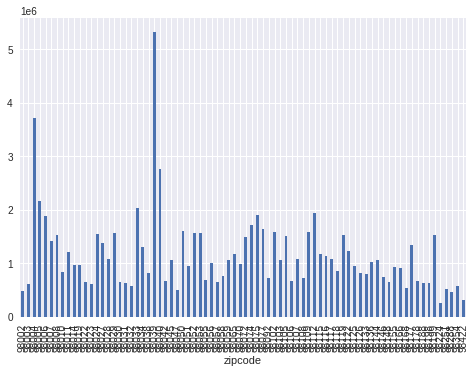

In [177]:
cleaned_kc.groupby(cleaned_kc.zipcode.astype('int')).price.mean().plot(kind='bar')

<AxesSubplot:xlabel='zipcode'>

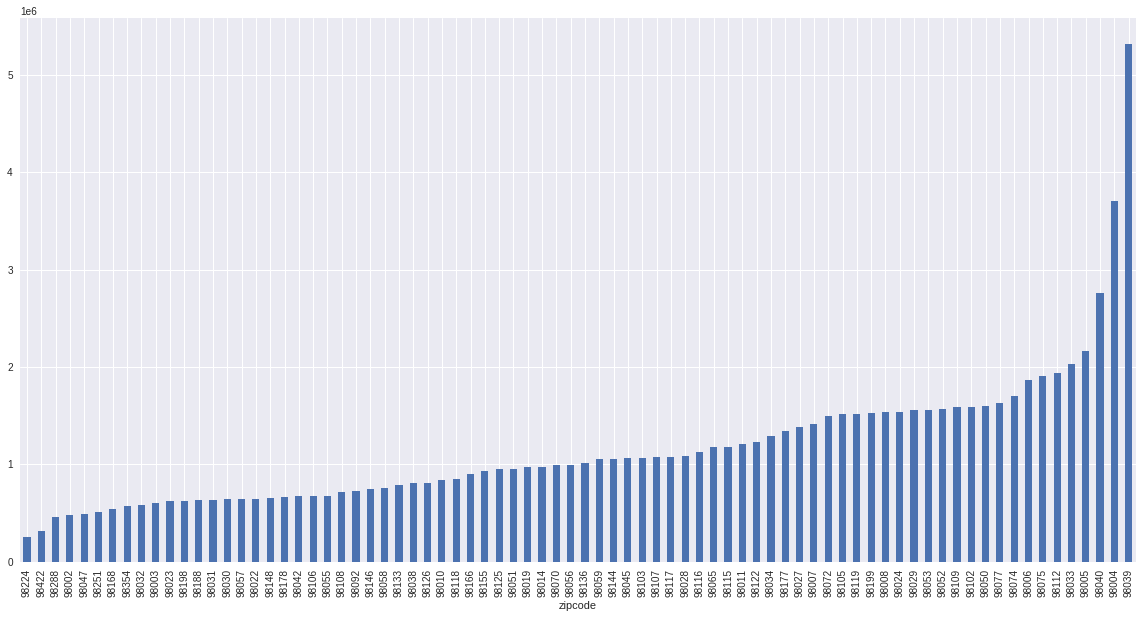

In [178]:
plt.figure(figsize=(20,10))
cleaned_kc.groupby(cleaned_kc.zipcode.astype('int')).price.mean().sort_values(ascending=True).plot(kind='bar')

In [179]:
cleaned_kc.zipcode.astype('int').min(),cleaned_kc.zipcode.astype('int').max()

(98002, 98422)

In [180]:
cleaned_kc['zipcode'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '98092', '98103', '98006',
       '98136', '98007', '98038', '98057', '98077', '98126', '98053',
       '98039', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '98198',
       '98125', '98112', '98034', '98056', '98059', '98005', '98040',
       '98014', '98106', '98029', '98122', '98003', '98117', '98042',
       '98119', '98065', '98022', '98072', '98058', '98108', '98115',
       '98074', '98105', '98024', '98146', '98109', '98102', '98028',
       '98188', '98177', '98075', '98010', '98148', '98047', '98032',
       '98070', '98051', '98288', '98354', '98050', '98251', '98224',
       '98422'], dtype=object)

#### Price column 

From our Business Understanding, it can be seen that this analysis is targeted at Upper-Middle-Class income group downwards.

According to the National Association of Realtors, an existing home’s median price has been over $400,000 since May 2022.

The cost of an upper-middle-class house will be significantly higher depending on the location. 

The typical upper-middle-class house price is $450,000 in most states.

Different states have varying definitions of how much upper-middle-class households make per annum. A typical house for the upper middle class is also relative to the state or specific location, making it hard to have one figure representing the cost of all upper-middle-class houses in the US.

#### Washington State
The typical price of an upper-middle-class house: $555, 943

Median household income of the upper middle class: $194,296

Percentage of the population considered upper middle class: 45%

Expected monthly payments for upper middle class house:$4,534

House prices in Washington are quite high due to the high cost of real estate, shortage of houses for sale, and local zoning laws. To afford an upper-middle-class home in this state, you need to dig deeper in your pocket.

Also, King County is considered a high end county in Washington State, therefore house prices tend towards the higher side.

Sources

Upper-middle-class house costs Zillow.com

Expected monthly payments https://www.mortgagecalculatorplus.com/

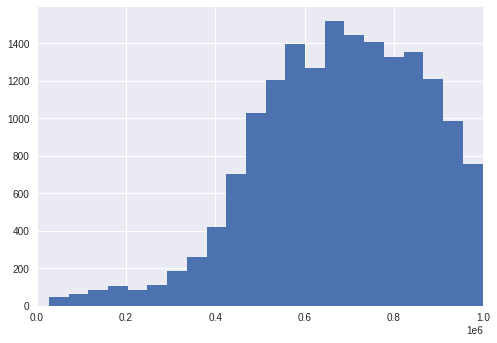

In [181]:
plt.hist(cleaned_kc['price'], bins='auto')
plt.xlim(0.0, 1000000.0);

<AxesSubplot:>

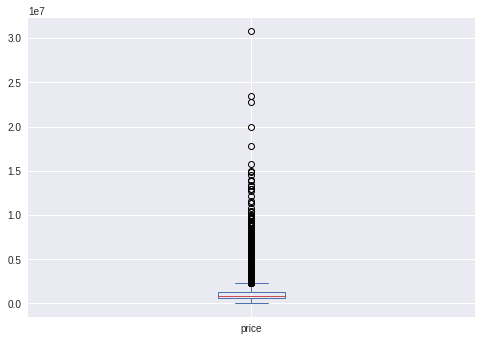

In [182]:
cleaned_kc.price.plot(kind='box')

In [183]:
base_kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872,43.539172
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073,31.300361
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,-1.000000
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075,17.000000
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790,41.000000
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394,65.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340,122.000000


Note that there's a large difference between the 75th percentile price and the max price(outliers), in order to focus on the upper middleclass, we take out houses sold above the 75th percentile price.

In [184]:
stats.zscore(cleaned_kc['price'])

0       -0.497570
1       -0.225909
2       -0.901181
3       -0.386688
4       -0.589048
           ...   
30150    0.478193
30151    0.209858
30152   -0.358967
30153   -0.386688
30154   -0.691614
Name: price, Length: 28549, dtype: float64

In [185]:
cleaned_kc = cleaned_kc[stats.zscore(cleaned_kc['price'])<=3]

In [186]:
cleaned_kc.isna().sum()

id               0
sale_date        0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
age              0
zipcode          0
dtype: int64

In [187]:
cleaned_kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age
count,2.814100e+04,2.814100e+04,28141.000000,28141.000000,28141.000000,2.814100e+04,28141.000000,28141.000000,28141.000000,28141.000000,28141.000000,28141.000000,28141.000000,28141.000000,28141.000000,28141.000000
mean,4.544511e+09,1.054619e+06,3.421627,2.307558,2095.292776,1.692162e+04,1.513201,1794.726627,476.766710,330.432856,211.618564,1973.443232,92.529796,47.547143,-122.213264,45.186632
std,2.887453e+09,6.076929e+05,0.971930,0.857812,906.905098,6.089475e+04,0.548900,829.595843,568.836035,281.375170,239.299411,31.707674,419.962608,0.144215,0.144997,31.057756
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.159700,-122.526650,-1.000000
25%,2.069600e+09,6.500000e+05,3.000000,2.000000,1430.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.440510,-122.331080,19.000000
50%,3.876313e+09,8.700000e+05,3.000000,2.500000,1930.000000,7.500000e+03,1.500000,1560.000000,0.000000,400.000000,140.000000,1976.000000,0.000000,47.560000,-122.228785,43.000000
75%,7.299011e+09,1.300000e+06,4.000000,3.000000,2600.000000,1.052300e+04,2.000000,2260.000000,960.000000,510.000000,310.000000,2000.000000,0.000000,47.673430,-122.123902,67.000000
max,9.904000e+09,3.810000e+06,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,4130.000000,3580.000000,4370.000000,2022.000000,2022.000000,47.789830,-121.163960,122.000000


In [188]:
# remove all values of 'price' greater than the 75th percentile value
#cleaned_kc = cleaned_kc[cleaned_kc.price < 1325000]

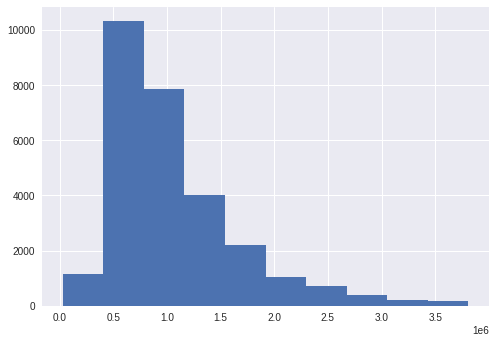

In [189]:
plt.hist(cleaned_kc['price']);

<AxesSubplot:>

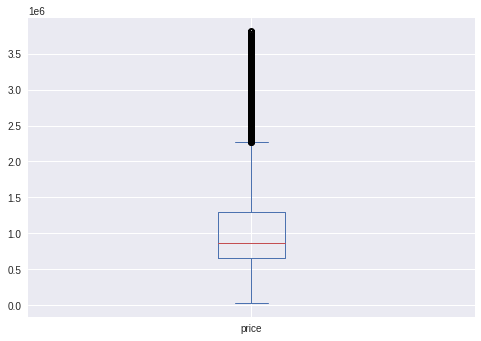

In [190]:
cleaned_kc.price.plot(kind='box')

In [191]:
cleaned_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28141 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             28141 non-null  int64         
 1   sale_date      28141 non-null  datetime64[ns]
 2   price          28141 non-null  float64       
 3   bedrooms       28141 non-null  int64         
 4   bathrooms      28141 non-null  float64       
 5   sqft_living    28141 non-null  int64         
 6   sqft_lot       28141 non-null  int64         
 7   floors         28141 non-null  float64       
 8   waterfront     28141 non-null  object        
 9   greenbelt      28141 non-null  object        
 10  nuisance       28141 non-null  object        
 11  view           28141 non-null  object        
 12  condition      28141 non-null  object        
 13  grade          28141 non-null  object        
 14  heat_source    28141 non-null  object        
 15  sewer_system   2814

#### Second Dummy Model

In [192]:
cat_columns_2 = ['waterfront', 'greenbelt', 'nuisance', 'view',
               'condition', 'grade', 'heat_source', 'sewer_system', 'zipcode']

In [193]:
dummy_kc_2 = pd.get_dummies(data=cleaned_kc, columns=cat_columns_2, drop_first=True)

In [194]:
dummy_kc_2.columns

Index(['id', 'sale_date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
       ...
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199', 'zipcode_98224', 'zipcode_98251', 'zipcode_98288',
       'zipcode_98354', 'zipcode_98422'],
      dtype='object', length=126)

In [195]:
X_dummy_2=dummy_kc_2.drop(labels =['id', 'sqft_living','yr_built', 'sqft_lot',
                               'yr_renovated','lat', 'long', 'sale_date','price','address'], axis=1)
y=dummy_kc_2.price

In [196]:
second_dummy_model = sm.OLS(y,sm.add_constant(X_dummy_2))
second_dummy_results = second_dummy_model.fit()
second_dummy_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     708.3
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:10:34   Log-Likelihood:            -3.9543e+05
No. Observations:               28141   AIC:                         7.911e+05
Df Residuals:                   28024   BIC:                         7.921e+05
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             6.05e+05    2.6e+04     23.236      0.000    5.54e+05    6.56e+05
bedrooms                         3538.6440   2650.688      1.335      0.182   -1656.834    8734.122
bathrooms                        4.194e+04   3779.588     11.095      0.000    3.45e+04    4.93e+04
floors                          -7.951e+04   5231.596    -15.198      0.000   -8.98e+04   -6.93e+04
sqft_above                        276.0799      4.657     59.285      0.000     266.952     285.208
sqft_basement                      98.0584      4.519     21.700      0.000      89.201     106.915
sqft_garage                       -23.0731      9.395     -2.456      0.014     -41.487      -4.659
sqft_patio                         42.4885      8.768      4.846      0.000      25.303      59.674
age                              -303.7066    101.175     -3.002      0.003    -502.014    -105.399
waterfront_YES                   2.126e+05   1.85e+04     11.488      0.000    1.76e+05    2.49e+05
greenbelt_YES                    3.801e+04    1.2e+04      3.180      0.001    1.46e+04    6.14e+04
nuisance_YES                    -4.937e+04   5034.143     -9.807      0.000   -5.92e+04   -3.95e+04
view_EXCELLENT                   3.963e+05   1.83e+04     21.623      0.000     3.6e+05    4.32e+05
view_FAIR                        6.408e+04    2.3e+04      2.786      0.005     1.9e+04    1.09e+05
view_GOOD                        1.033e+05   1.31e+04      7.894      0.000    7.77e+04    1.29e+05
view_NONE                       -1.016e+05   7891.822    -12.874      0.000   -1.17e+05   -8.61e+04
condition_Fair                  -6.988e+04   2.12e+04     -3.304      0.001   -1.11e+05   -2.84e+04
condition_Good                   6.242e+04   4722.765     13.217      0.000    5.32e+04    7.17e+04
condition_Poor                  -1.065e+05   4.16e+04     -2.561      0.010   -1.88e+05    -2.5e+04
condition_Very Good              1.326e+05   6622.063     20.019      0.000     1.2e+05    1.46e+05
grade_11 Excellent               1.784e+05   2.06e+04      8.664      0.000    1.38e+05    2.19e+05
grade_12 Luxury                  2.352e+05   4.12e+04      5.710      0.000    1.55e+05    3.16e+05
grade_13 Mansion                -5.569e+05   1.55e+05     -3.603      0.000    -8.6e+05   -2.54e+05
grade_2 Substandard             -3.163e+05   3.11e+05     -1.017      0.309   -9.26e+05    2.93e+05
grade_3 Poor                    -3.652e+05   1.14e+05     -3.210      0.001   -5.88e+05   -1.42e+05
grade_4 Low                     -3.549e+05   4.99e+04     -7.106      0.000   -4.53e+05   -2.57e+05
grade_5 Fair                    -4.236e+05   2.16e+04    -19.576      0.000   -4.66e+05   -3.81e+05
grade_6 Low Average             -4.637e+05   1.46e+04    -31.830      0.000   -4.92

The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 69% of the variance in price of houses in King County, so as expected, other variables also affect the price at which a house is sold for.

Most of the model coefficients are statistically significant, with p-values below 0.05 and are therefore statistically significant, however there is need for some data cleaning and engineering to help improve the performance of the model.

In [197]:
second_dummy_mae = second_dummy_results.resid.abs().sum() / len(y)
second_dummy_mae

202768.22580681622

Here, the mean absolute error decreased from 341340 to 189502, which which implies that every prediction of the first dummy model is off by $189502. This is an improvement in overall performance of the model.

#### Bedrooms column
Note the following from the above kc_cleaned.describe() function:

mean = 3.437396; 75% = 4; min = 0; max = 13

In [198]:
cleaned_kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age
count,2.814100e+04,2.814100e+04,28141.000000,28141.000000,28141.000000,2.814100e+04,28141.000000,28141.000000,28141.000000,28141.000000,28141.000000,28141.000000,28141.000000,28141.000000,28141.000000,28141.000000
mean,4.544511e+09,1.054619e+06,3.421627,2.307558,2095.292776,1.692162e+04,1.513201,1794.726627,476.766710,330.432856,211.618564,1973.443232,92.529796,47.547143,-122.213264,45.186632
std,2.887453e+09,6.076929e+05,0.971930,0.857812,906.905098,6.089475e+04,0.548900,829.595843,568.836035,281.375170,239.299411,31.707674,419.962608,0.144215,0.144997,31.057756
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.159700,-122.526650,-1.000000
25%,2.069600e+09,6.500000e+05,3.000000,2.000000,1430.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.440510,-122.331080,19.000000
50%,3.876313e+09,8.700000e+05,3.000000,2.500000,1930.000000,7.500000e+03,1.500000,1560.000000,0.000000,400.000000,140.000000,1976.000000,0.000000,47.560000,-122.228785,43.000000
75%,7.299011e+09,1.300000e+06,4.000000,3.000000,2600.000000,1.052300e+04,2.000000,2260.000000,960.000000,510.000000,310.000000,2000.000000,0.000000,47.673430,-122.123902,67.000000
max,9.904000e+09,3.810000e+06,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,4130.000000,3580.000000,4370.000000,2022.000000,2022.000000,47.789830,-121.163960,122.000000


In [199]:
cleaned_kc['bedrooms'].value_counts()

3     11983
4      9113
2      3498
5      2575
6       446
1       361
7        73
0        37
8        36
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64

Text(0.5, 1.0, 'Price Against Number of Bedrooms')

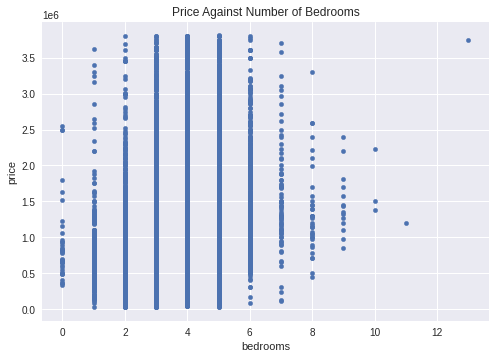

In [200]:
cleaned_kc.plot.scatter(x='bedrooms', y='price')
plt.title('Price Against Number of Bedrooms')

<AxesSubplot:>

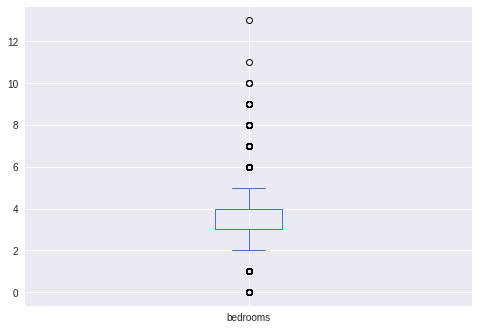

In [201]:
cleaned_kc.bedrooms.plot(kind='box')

take out houses with more than 6 rooms

In [202]:
cleaned_kc = cleaned_kc[cleaned_kc.bedrooms < 7]

In [203]:
cleaned_kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age
count,2.801300e+04,2.801300e+04,28013.000000,28013.000000,28013.000000,2.801300e+04,28013.000000,28013.000000,28013.000000,28013.000000,28013.000000,28013.000000,28013.000000,28013.000000,28013.000000,28013.000000
mean,4.543975e+09,1.052431e+06,3.402313,2.299004,2087.797415,1.691907e+04,1.511620,1789.510049,474.525542,330.802592,211.289794,1973.495520,91.668547,47.546936,-122.212954,45.164245
std,2.887091e+09,6.062697e+05,0.928854,0.844340,894.619663,6.094051e+04,0.548158,821.854310,566.561873,280.757304,238.502979,31.678613,418.098214,0.144302,0.145130,31.036566
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.159700,-122.526650,-1.000000
25%,2.063550e+09,6.499950e+05,3.000000,2.000000,1430.000000,5.000000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.440025,-122.330950,19.000000
50%,3.876490e+09,8.676860e+05,3.000000,2.500000,1930.000000,7.500000e+03,1.500000,1560.000000,0.000000,400.000000,140.000000,1976.000000,0.000000,47.559745,-122.228105,43.000000
75%,7.299010e+09,1.300000e+06,4.000000,3.000000,2600.000000,1.052400e+04,2.000000,2250.000000,950.000000,510.000000,310.000000,2001.000000,0.000000,47.673515,-122.123560,67.000000
max,9.904000e+09,3.810000e+06,6.000000,10.500000,10910.000000,3.253932e+06,4.000000,8710.000000,4000.000000,3580.000000,4370.000000,2022.000000,2022.000000,47.789830,-121.163960,122.000000


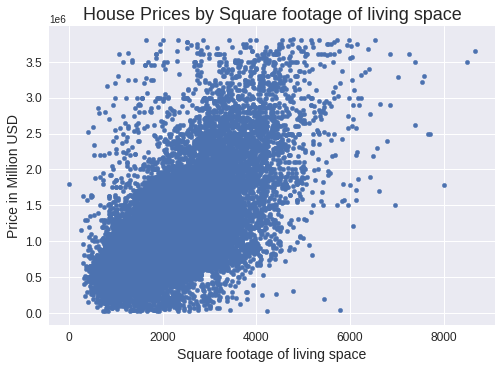

In [275]:
cleaned_kc.plot.scatter(x='sqft_living', y='price')
plt.title('House Prices by Square footage of living space', fontsize=18)
plt.xlabel('Square footage of living space', fontsize=14)
plt.ylabel('Price in Million USD', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

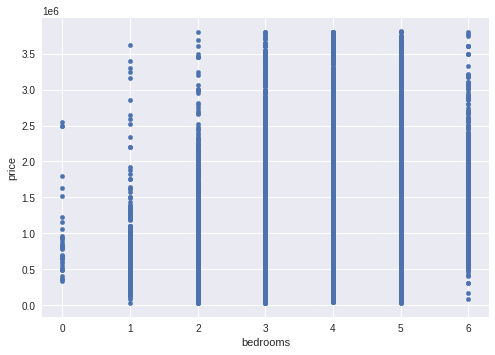

In [204]:
cleaned_kc.plot.scatter(x='bedrooms', y='price')

<AxesSubplot:>

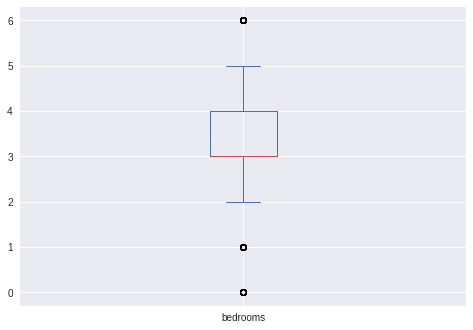

In [205]:
cleaned_kc.bedrooms.plot(kind='box')

#### Bathrooms column
Note the following from the above kc_cleaned.describe() function:

mean = 2.326713; 75% = 3; min = 0; max = 9.5

In [206]:
# also, let's take a look at the value counts in the bedroom column

cleaned_kc['bathrooms'].value_counts()

2.5     7900
2.0     6782
1.0     4438
3.0     3929
3.5     2041
1.5     1725
4.0      574
4.5      420
5.0       93
5.5       52
0.0       24
6.0       17
6.5        9
0.5        5
7.0        2
10.5       1
7.5        1
Name: bathrooms, dtype: int64

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

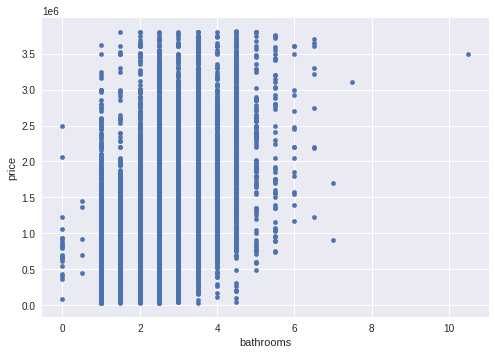

In [207]:
cleaned_kc.plot.scatter(x='bathrooms', y='price')

<AxesSubplot:>

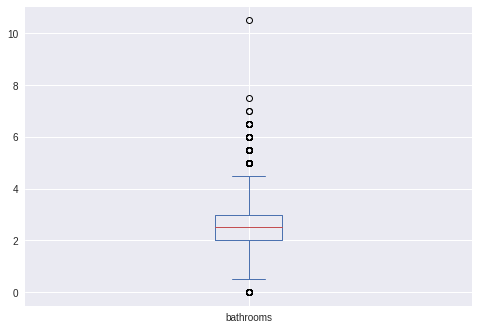

In [208]:
cleaned_kc.bathrooms.plot(kind='box')

In [209]:
# to remove the outliers, we take out values outside of (mean + or - 3SD)

cleaned_kc = cleaned_kc[cleaned_kc.bathrooms < 7]

In [210]:
cleaned_kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age
count,2.800900e+04,2.800900e+04,28009.000000,28009.000000,28009.000000,2.800900e+04,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000
mean,4.544191e+09,1.052253e+06,3.401942,2.298190,2087.282266,1.691806e+04,1.511532,1789.170802,474.334464,330.758078,211.261773,1973.491199,91.681638,47.546928,-122.212939,45.168232
std,2.887226e+09,6.060008e+05,0.928402,0.841467,892.799737,6.094387e+04,0.548142,820.797859,566.334820,280.747814,238.470704,31.678466,418.126633,0.144308,0.145134,31.036637
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.159700,-122.526650,-1.000000
25%,2.063550e+09,6.499900e+05,3.000000,2.000000,1430.000000,5.000000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.440010,-122.330945,19.000000
50%,3.876540e+09,8.675000e+05,3.000000,2.500000,1930.000000,7.500000e+03,1.500000,1560.000000,0.000000,400.000000,140.000000,1976.000000,0.000000,47.559745,-122.228085,43.000000
75%,7.299011e+09,1.300000e+06,4.000000,3.000000,2600.000000,1.052400e+04,2.000000,2250.000000,950.000000,510.000000,310.000000,2001.000000,0.000000,47.673515,-122.123420,67.000000
max,9.904000e+09,3.810000e+06,6.000000,6.500000,8670.000000,3.253932e+06,4.000000,8500.000000,4000.000000,3580.000000,4370.000000,2022.000000,2022.000000,47.789830,-121.163960,122.000000


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

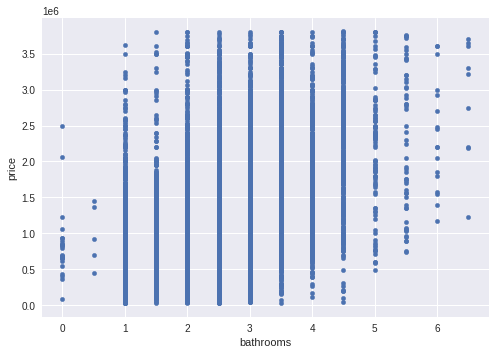

In [211]:
cleaned_kc.plot.scatter(x='bathrooms', y='price')

<AxesSubplot:>

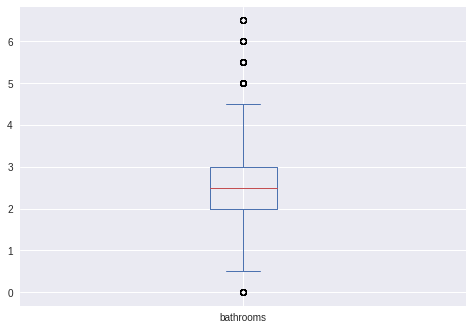

In [212]:
cleaned_kc.bathrooms.plot(kind='box')

#### View column



In [213]:
cleaned_kc['view'].value_counts()

NONE         24783
AVERAGE       1793
GOOD           811
EXCELLENT      423
FAIR           199
Name: view, dtype: int64

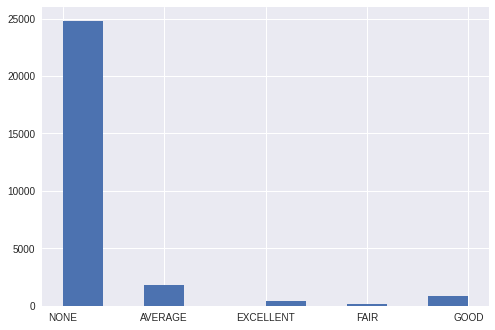

In [214]:
plt.hist(cleaned_kc['view']);

<AxesSubplot:xlabel='view'>

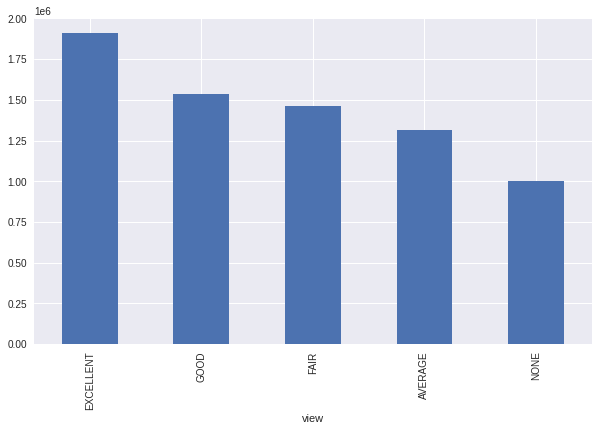

In [215]:
cleaned_kc.groupby('view').mean()['price'].sort_values(ascending=False).plot.bar(figsize=(10,6))

There is an appreciable spread in price caused by various view classes.


#### Condition column

In [216]:
cleaned_kc['condition'].value_counts()

Average      16815
Good          7768
Very Good     3146
Fair           221
Poor            59
Name: condition, dtype: int64

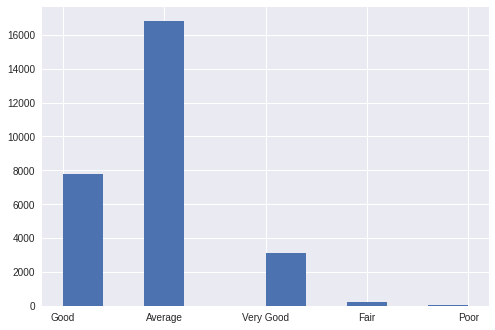

In [217]:
plt.hist(cleaned_kc['condition']);

<AxesSubplot:xlabel='condition'>

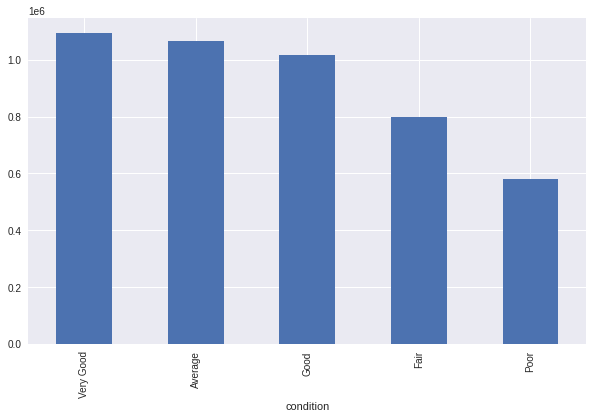

In [218]:
cleaned_kc.groupby('condition').mean()['price'].sort_values(ascending=False).plot.bar(figsize=(10,6))


Engineer the condition column to have values: Above Average, Average and Below Average.

In [219]:
cleaned_kc['condition_cl'] = cleaned_kc.condition.replace({'Very Good':'Top', 'Good':'Mid', 'Average':'Mid',
                                                           'Fair':'Low', 'Poor':'Low'})

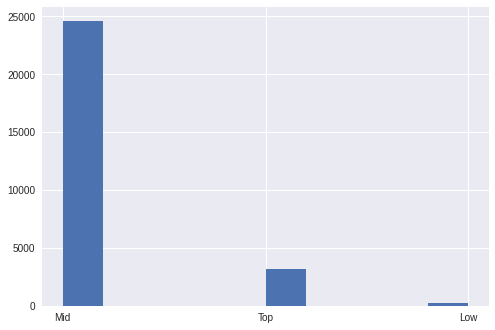

In [220]:
plt.hist(cleaned_kc['condition_cl']);

In [221]:
cleaned_kc.groupby('condition_cl').mean().sort_values(by='price', ascending=False)[['price']]

,price
condition_cl,
Top,1.093525e+06
Mid,1.050385e+06
Low,7.525380e+05


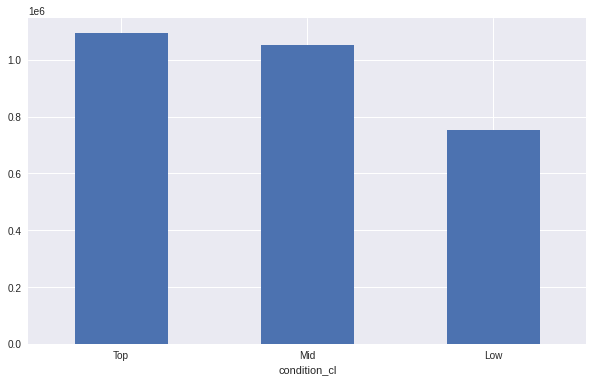

In [222]:
cleaned_kc.groupby('condition_cl').mean()['price'].sort_values(ascending=False).plot.bar(figsize=(10,6))
plt.xticks(fontsize=10, rotation='horizontal');

#### Grade column

In [223]:
cleaned_kc['grade'].value_counts()

7 Average        11186
8 Good            8603
9 Better          3461
6 Low Average     2765
10 Very Good      1238
5 Fair             366
11 Excellent       276
12 Luxury           58
4 Low               43
3 Poor               8
13 Mansion           4
2 Substandard        1
Name: grade, dtype: int64

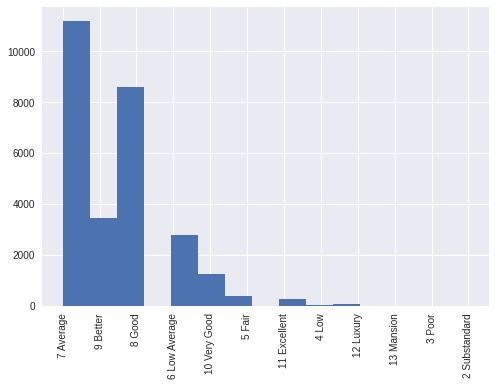

In [224]:
plt.hist(cleaned_kc['grade'], bins=15)
plt.xticks(fontsize=10, rotation='vertical');

Engineer the grade column to have values: Above Average, Average and Below Average.

<AxesSubplot:xlabel='grade'>

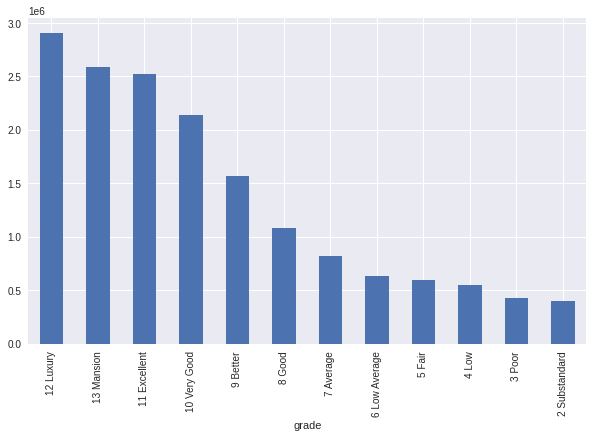

In [225]:
cleaned_kc.groupby('grade').mean()['price'].sort_values(ascending=False).plot.bar(figsize=(10,6))

In [226]:
cleaned_kc['grade_cl'] = cleaned_kc.grade.replace({'13 Mansion':'Mansion', '12 Luxury':'Luxury',
                                                   '11 Excellent':'Excellent', '10 Very Good':'Very Good',
                                                   '9 Better':'Better', '8 Good':'Good', '7 Average':'Average', 
                                                   '6 Low Average':'Fair', '5 Fair':'Fair',
                                                   '4 Low':'Fair', '3 Poor':'Poor', 
                                                   '2 Substandard':'Poor'})

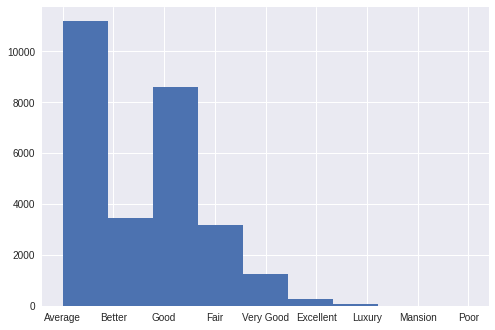

In [227]:
plt.hist(cleaned_kc['grade_cl'], bins=9);

In [228]:
cleaned_kc['grade_cl'].value_counts()

Average      11186
Good          8603
Better        3461
Fair          3174
Very Good     1238
Excellent      276
Luxury          58
Poor             9
Mansion          4
Name: grade_cl, dtype: int64

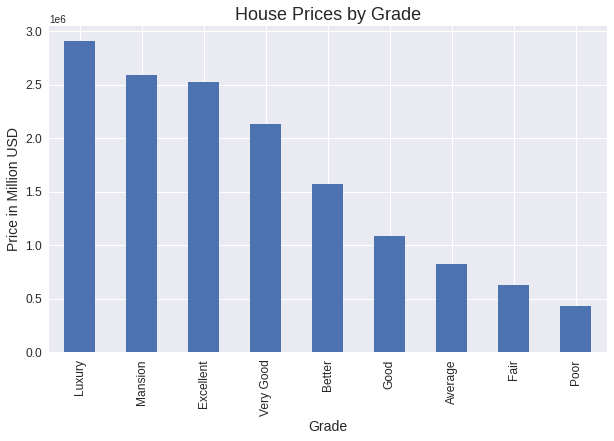

In [270]:
cleaned_kc.groupby('grade_cl').mean()['price'].sort_values(ascending=False).plot.bar(figsize=(10,6))
plt.title('House Prices by Grade', fontsize=18)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Price in Million USD', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Heat_source column

In [230]:
cleaned_kc['heat_source'].value_counts()

Gas                  19237
Electricity           5753
Oil                   2851
Gas/Solar               88
Electricity/Solar       57
Other                   19
Oil/Solar                4
Name: heat_source, dtype: int64

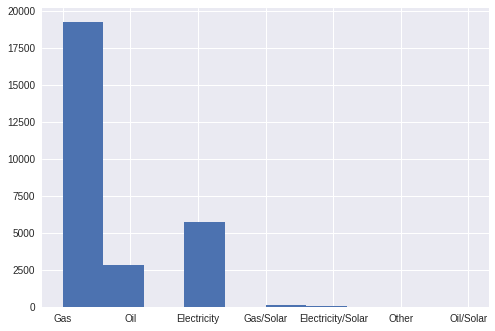

In [231]:
plt.hist(cleaned_kc['heat_source']);

<AxesSubplot:xlabel='heat_source'>

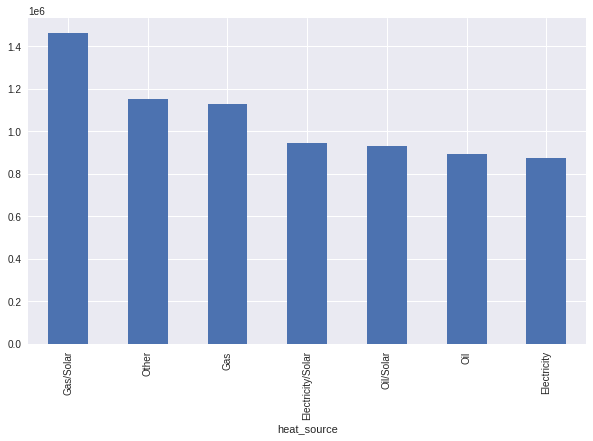

In [232]:
cleaned_kc.groupby('heat_source').mean()['price'].sort_values(ascending=False).plot.bar(figsize=(10,6))

Engineer the heat_source column to read: Gas, Oil, Electricity, Combined and Other.

In [233]:
cleaned_kc['heat_source_cl'] = cleaned_kc.heat_source.replace({'Electricity/Solar':'Electricity', 'Oil/Solar':'Oil'})

In [234]:
cleaned_kc['heat_source_cl'].value_counts()

Gas            19237
Electricity     5810
Oil             2855
Gas/Solar         88
Other             19
Name: heat_source_cl, dtype: int64

<AxesSubplot:xlabel='heat_source_cl'>

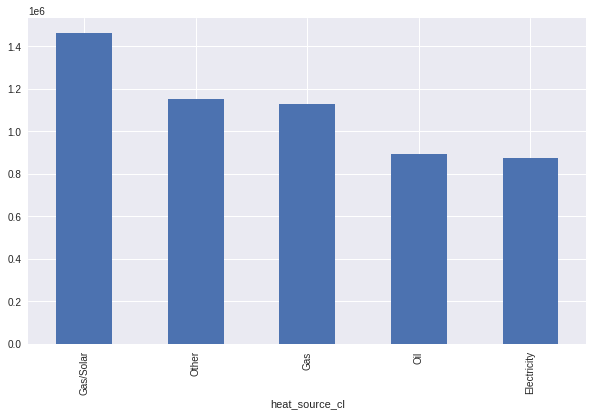

In [235]:
cleaned_kc.groupby('heat_source_cl').mean()['price'].sort_values(ascending=False).plot.bar(figsize=(10,6))

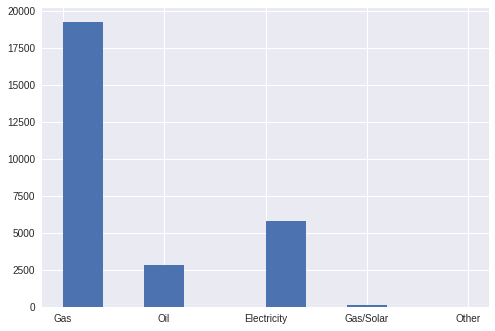

In [236]:
plt.hist(cleaned_kc['heat_source_cl']);

#### Sewer_system column

In [237]:
cleaned_kc['sewer_system'].value_counts()

PUBLIC                23923
PRIVATE                4079
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

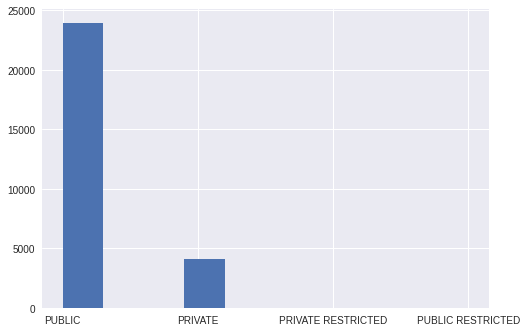

In [238]:
plt.hist(cleaned_kc['sewer_system']);

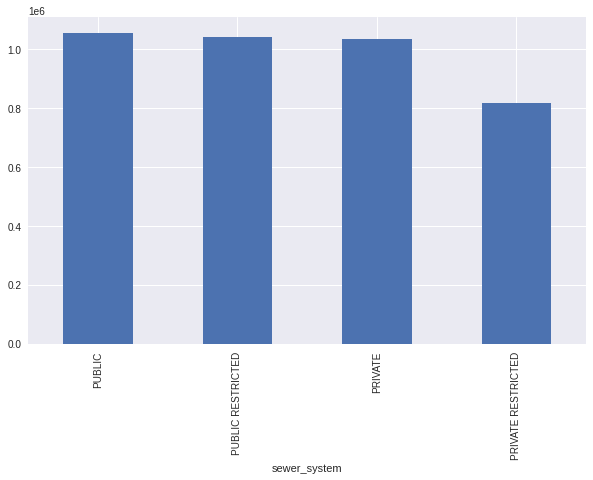

In [239]:
cleaned_kc.groupby('sewer_system').mean()['price'].sort_values(ascending=False).plot.bar(figsize=(10,6));

## Final Model

In [240]:
final_columns= ['waterfront', 'greenbelt', 'nuisance', 'view', 'heat_source_cl', 'sewer_system',
                   'condition_cl', 'grade_cl', 'zipcode']

In [241]:
final_col = pd.get_dummies(data=cleaned_kc, columns=final_columns, drop_first=True)

In [242]:
final_col.columns

Index(['id', 'sale_date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade',
       ...
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199', 'zipcode_98224', 'zipcode_98251', 'zipcode_98288',
       'zipcode_98354', 'zipcode_98422'],
      dtype='object', length=122)

In [243]:
X_final=final_col.drop(labels =['id', 'sale_date','price','address', 'condition', 'grade',
                                   'heat_source', 'yr_built', 'yr_renovated', 'sqft_lot', 
                                   'long', 'lat'], axis=1)
y=final_col.price

In [244]:
final_model = sm.OLS(y,sm.add_constant(X_final))
final_results = final_model.fit()
final_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     746.6
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:10:39   Log-Likelihood:            -3.9346e+05
No. Observations:               28009   AIC:                         7.871e+05
Df Residuals:                   27898   BIC:                         7.880e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.652e+04   2.94e+04      1.585      0.113    -1.1e+04    1.04e+05
bedrooms                        -1962.9228   2798.177     -0.702      0.483   -7447.487    3521.642
bathrooms                        3.411e+04   3927.373      8.685      0.000    2.64e+04    4.18e+04
sqft_living                       131.0023      8.866     14.775      0.000     113.624     148.381
floors                          -7.277e+04   5268.615    -13.812      0.000   -8.31e+04   -6.24e+04
sqft_above                        160.5612      9.019     17.803      0.000     142.884     178.238
sqft_basement                      21.6238      6.735      3.211      0.001       8.424      34.824
sqft_garage                         3.1804      9.564      0.333      0.739     -15.565      21.926
sqft_patio                         42.7107      8.768      4.871      0.000      25.524      59.897
age                               247.9443     96.488      2.570      0.010      58.823     437.066
waterfront_YES                   2.092e+05   1.85e+04     11.312      0.000    1.73e+05    2.45e+05
greenbelt_YES                    3.322e+04   1.19e+04      2.785      0.005    9842.595    5.66e+04
nuisance_YES                    -5.146e+04   5026.489    -10.238      0.000   -6.13e+04   -4.16e+04
view_EXCELLENT                   4.006e+05   1.84e+04     21.820      0.000    3.65e+05    4.37e+05
view_FAIR                        6.208e+04    2.3e+04      2.698      0.007     1.7e+04    1.07e+05
view_GOOD                        9.283e+04   1.31e+04      7.099      0.000    6.72e+04    1.18e+05
view_NONE                       -1.013e+05   7883.205    -12.856      0.000   -1.17e+05   -8.59e+04
heat_source_cl_Gas               1.252e+04   5022.366      2.492      0.013    2673.221    2.24e+04
heat_source_cl_Gas/Solar          1.28e+05    3.3e+04      3.877      0.000    6.33e+04    1.93e+05
heat_source_cl_Oil              -3364.2384   7604.602     -0.442      0.658   -1.83e+04    1.15e+04
heat_source_cl_Other              1.32e+05   7.09e+04      1.863      0.062   -6868.343    2.71e+05
sewer_system_PRIVATE RESTRICTED -3.496e+05   1.39e+05     -2.519      0.012   -6.22e+05   -7.76e+04
sewer_system_PUBLIC              -1.27e+04   6645.953     -1.911      0.056   -2.57e+04     323.454
sewer_system_PUBLIC RESTRICTED    826.5293   2.17e+05      0.004      0.997   -4.24e+05    4.25e+05
condition_cl_Mid                 9.072e+04   1.89e+04      4.812      0.000    5.38e+04    1.28e+05
condition_cl_Top                 1.823e+05   1.96e+04      9.322      0.000    1.44e+05    2.21e+05
grade_cl_Better                  2.394e+05   8102.250     29.545      0.000    2.24e+05    2.55e+05
grade_cl_Excellent               6.207e+05   2.14e+04     28.938      0.000    5.79

<AxesSubplot:>

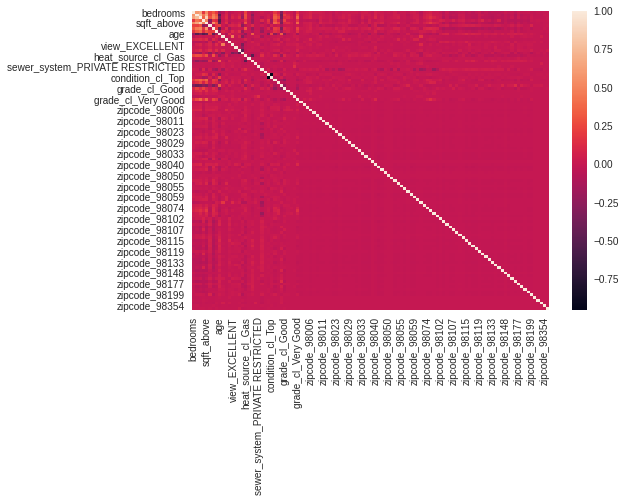

In [245]:
import seaborn as sns
sns.heatmap(X_final.corr())

In [246]:
final_results.resid.abs()

0        255761.075596
1        137758.383574
2        606623.876318
3        354209.117858
4         73922.513648
             ...      
30150    371877.089306
30151     93210.025321
30152    105714.516414
30153     20351.910643
30154     57064.784392
Length: 28009, dtype: float64

In [247]:
final_mae = final_results.resid.abs().sum() / len(y)
final_mae

202615.21988408547

## Regression Results

On the overall, the final model is a much better regression model compared to the baseline model.

Both the baseline and final models are statistically significant, with F-statistic p-values below 0.05. The implication of this is that in both models, 

The R-squared increased from 0.406 to 0.746. The implication been that, while the baseline model can explain about 41% of variavce/change in the price a house is sold for, the final model explains about 75% of the changes.

The mean absolute errer decreased from 384671 in the baseline model to 202615 in the final model. This means that on the average, the price(in US Dollars) predictions made by the baseline model will be off by $384671$ while on the average, the price predictions made by the final model will be off by $202615$.

#### sqft_living

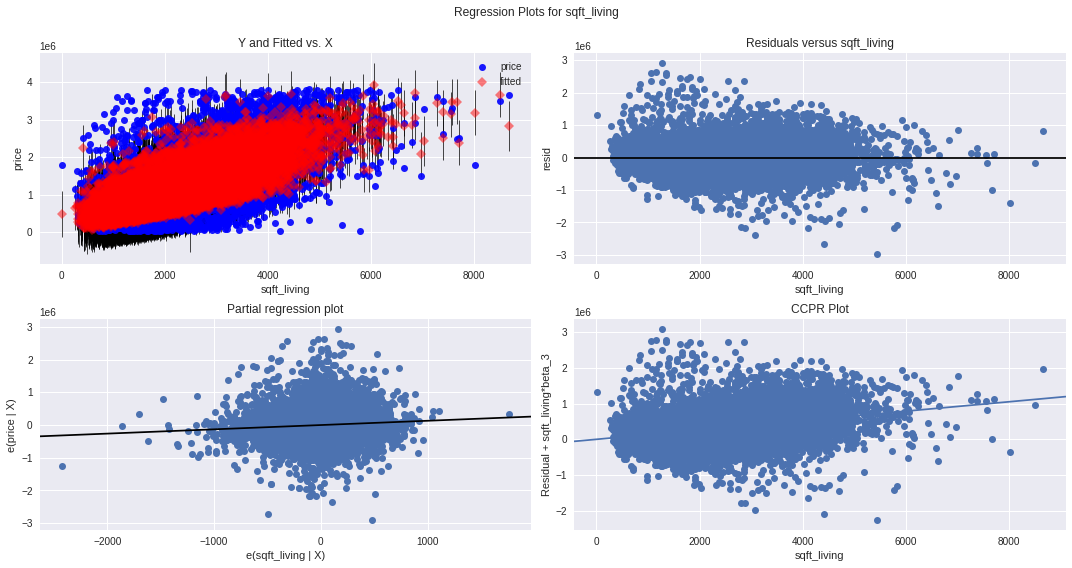

In [248]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(final_results, 'sqft_living', fig=fig)
plt.show()

From the final model, it is seen that the 'sqft_living' feature is statistically significant with a p-value less than 0.05.
Also, in a situation where all other features are equal to zero, every square foot increase in the size of the living area of a house, the price of the house increases by $131.

#### age

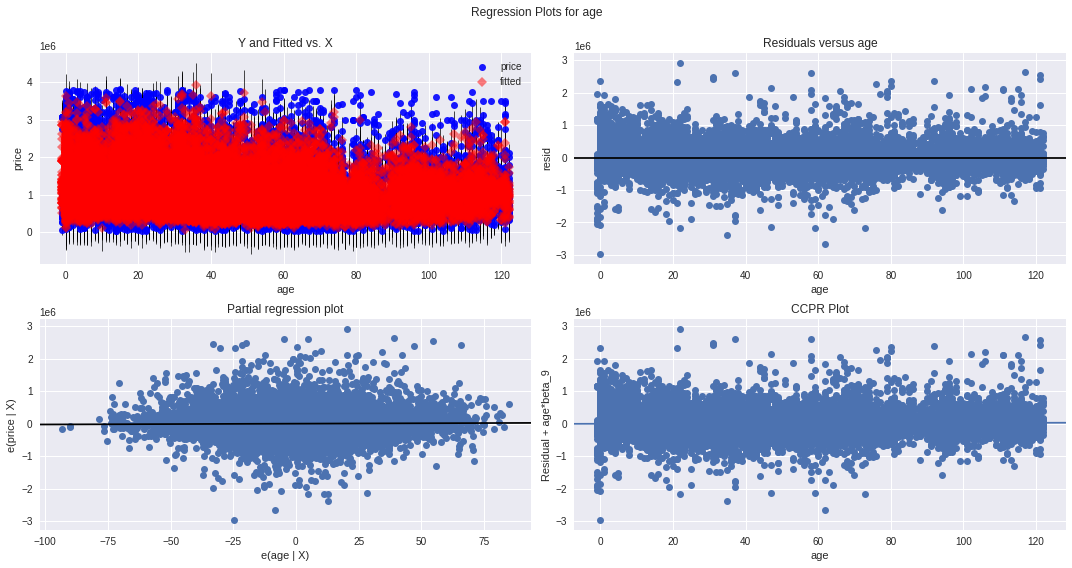

In [249]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(final_results, 'age', fig=fig)
plt.show()

From the final model, it is seen that the 'age' feature is statistically significant with a p-value less than 0.05. Also, in a situation where all other features are equal to zero, every year increase in the age of a house, the price of the house increases by $248.

#### waterfront

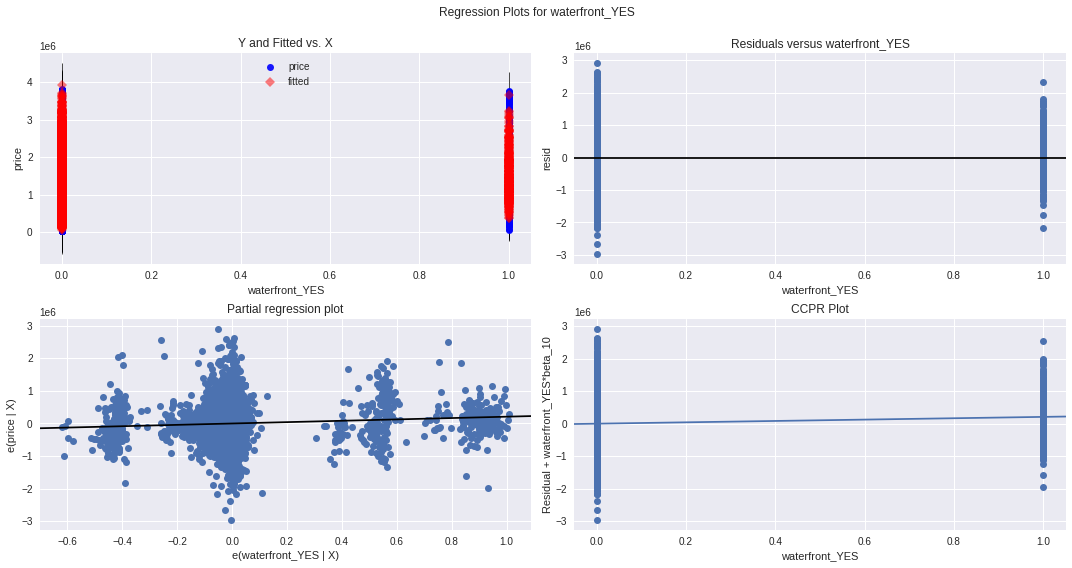

In [250]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(final_results, 'waterfront_YES', fig=fig)
plt.show()

From the final model, it is seen that the 'waterfront' feature is statistically significant with a p-value less than 0.05. 

Also, in a situation where all other features are equal to zero, a house located by a waterfront is $209,200 more expensive than a house not located by a waterfront.

#### greenbelt

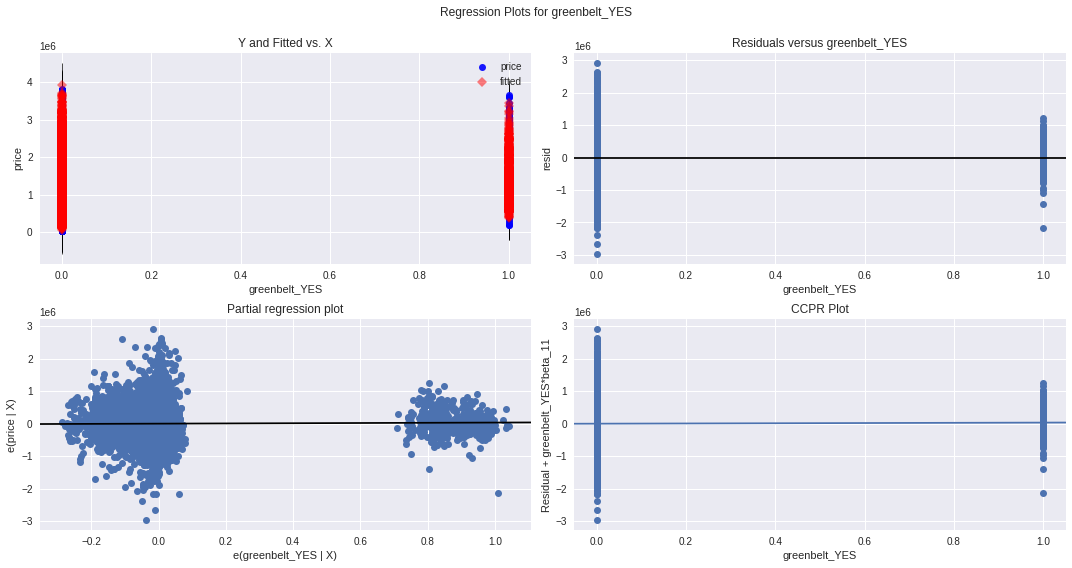

In [251]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(final_results, 'greenbelt_YES', fig=fig)
plt.show()

From the final model, it is seen that the 'greenbelt' feature is statistically significant with a p-value less than 0.05.

Also, in a situation where all other features are equal to zero, a house located on the Greenbelt is $33,220 more expensive than a house not.

## Level Up: Project Enhancements

### Scaling up the feature which are measured in Square feet

#### sqft_living
Convert the sqft_living feature to metric unit, that is convert the unit of measurement from square feet to meter square.
also, the name 'sqft_living' will no longer be appropriate, hence change the name to 'ms_living'.


In [252]:
X_metric = X_final.copy()
# 1 Square foot = 0.0929 Square meter
X_metric['ms_living'] = X_metric['sqft_living'] * 0.0929

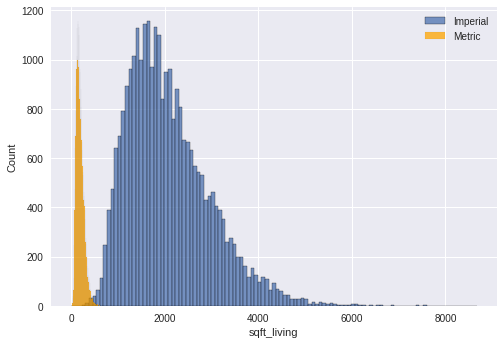

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.histplot(data=X_final, x='sqft_living', label="Imperial", ax=ax)
sns.histplot(data=X_metric, x='ms_living', label="Metric", color="orange", ax=ax)
ax.legend();

#### sqft_above
Convert the sqft_above feature to metric unit, that is convert the unit of measurement from square feet to meter square. also, the name 'sqft_above' will no longer be appropriate, hence change the name to 'ms_above'.

In [254]:
# 1 Square foot = 0.0929 Square meter
X_metric['ms_above'] = X_metric['sqft_above'] * 0.0929

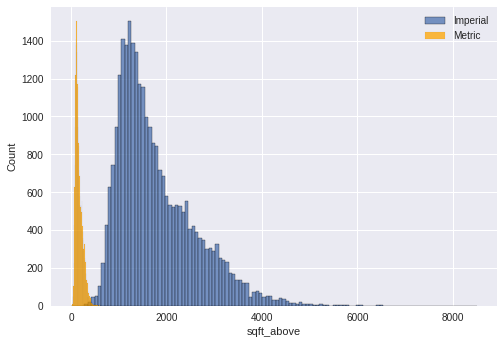

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.histplot(data=X_final, x='sqft_above', label="Imperial", ax=ax)
sns.histplot(data=X_metric, x='ms_above', label="Metric", color="orange", ax=ax)
ax.legend();

#### sqft_basement
Convert the sqft_basement feature to metric unit, that is convert the unit of measurement from square feet to meter square. also, the name 'sqft_basement' will no longer be appropriate, hence change the name to 'ms_basement'.

In [256]:
# 1 Square foot = 0.0929 Square meter
X_metric['ms_basement'] = X_metric['sqft_basement'] * 0.0929

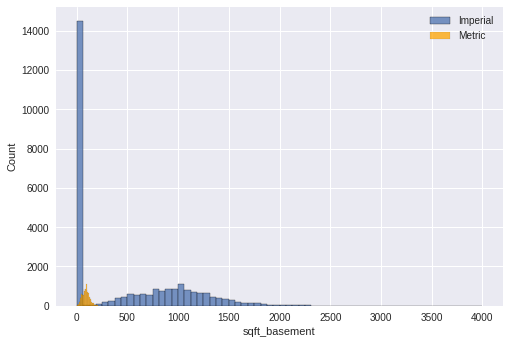

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.histplot(data=X_final, x='sqft_basement', label="Imperial", ax=ax)
sns.histplot(data=X_metric, x='ms_basement', label="Metric", color="orange", ax=ax)
ax.legend();

#### sqft_garage
Convert the sqft_garage feature to metric unit, that is convert the unit of measurement from square feet to meter square. also, the name 'sqft_garage' will no longer be appropriate, hence change the name to 'ms_garage'.

In [258]:
# 1 Square foot = 0.0929 Square meter
X_metric['ms_garage'] = X_metric['sqft_garage'] * 0.0929

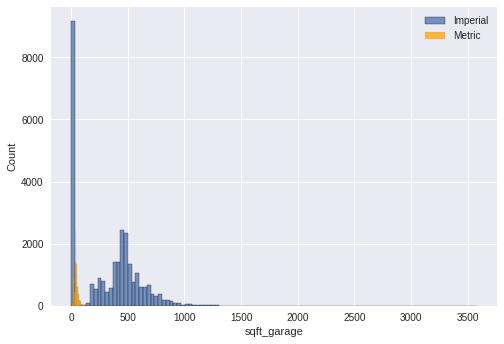

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.histplot(data=X_final, x='sqft_garage', label="Imperial", ax=ax)
sns.histplot(data=X_metric, x='ms_garage', label="Metric", color="orange", ax=ax)
ax.legend();

#### sqft_patio
Convert the sqft_patio feature to metric unit, that is convert the unit of measurement from square feet to meter square. also, the name 'sqft_patio' will no longer be appropriate, hence change the name to 'ms_patio'.

In [260]:
# 1 Square foot = 0.0929 Square meter
X_metric['ms_patio'] = X_metric['sqft_patio'] * 0.0929

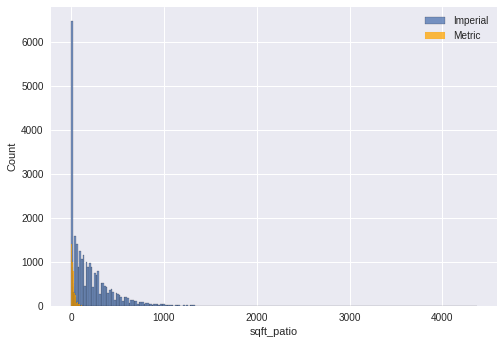

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.histplot(data=X_final, x='sqft_patio', label="Imperial", ax=ax)
sns.histplot(data=X_metric, x='ms_patio', label="Metric", color="orange", ax=ax)
ax.legend();

#### Creating a Metric model

In [262]:
X_metric

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,age,waterfront_YES,...,zipcode_98224,zipcode_98251,zipcode_98288,zipcode_98354,zipcode_98422,ms_living,ms_above,ms_basement,ms_garage,ms_patio
0,4,1.0,1180,1.0,1180,0,0,40,53,0,...,0,0,0,0,0,109.622,109.622,0.000,0.000,3.716
1,5,2.5,2770,1.0,1570,1570,0,240,71,0,...,0,0,0,0,0,257.333,145.853,145.853,0.000,22.296
2,6,2.0,2880,1.0,1580,1580,0,0,65,0,...,0,0,0,0,0,267.552,146.782,146.782,0.000,0.000
3,3,3.0,2160,2.0,1090,1070,200,270,11,0,...,0,0,0,0,0,200.664,101.261,99.403,18.580,25.083
4,2,2.0,1120,2.0,1120,550,550,30,9,0,...,0,0,0,0,0,104.048,104.048,51.095,51.095,2.787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,5,2.0,1910,1.5,1600,1130,0,210,100,0,...,0,0,0,0,0,177.439,148.640,104.977,0.000,19.509
30151,3,2.0,2020,2.0,2020,0,0,520,10,0,...,0,0,0,0,0,187.658,187.658,0.000,0.000,48.308
30152,3,2.0,1620,1.0,940,920,240,110,27,0,...,0,0,0,0,0,150.498,87.326,85.468,22.296,10.219
30153,3,2.5,2570,2.0,1830,740,480,100,16,0,...,0,0,0,0,0,238.753,170.007,68.746,44.592,9.290


In [263]:
X_metric=X_metric.drop(labels =['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'], axis=1)
y=final_col.price

In [264]:
X_metric.columns

Index(['bedrooms', 'bathrooms', 'floors', 'age', 'waterfront_YES',
       'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD',
       ...
       'zipcode_98224', 'zipcode_98251', 'zipcode_98288', 'zipcode_98354',
       'zipcode_98422', 'ms_living', 'ms_above', 'ms_basement', 'ms_garage',
       'ms_patio'],
      dtype='object', length=110)

In [265]:
metric_model = sm.OLS(y, sm.add_constant(X_metric))
metric_results = metric_model.fit()

print(f"""
Final model adjusted R-Squared:      {final_results.rsquared_adj}
Metric model adjusted R-Squared: {metric_results.rsquared_adj}
""")


Final model adjusted R-Squared:      0.7454326800829914
Metric model adjusted R-Squared: 0.7454326800829914



In [266]:
metric_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     746.6
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:10:52   Log-Likelihood:            -3.9346e+05
No. Observations:               28009   AIC:                         7.871e+05
Df Residuals:                   27898   BIC:                         7.880e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.652e+04   2.94e+04      1.585      0.113    -1.1e+04    1.04e+05
bedrooms                        -1962.9228   2798.177     -0.702      0.483   -7447.487    3521.642
bathrooms                        3.411e+04   3927.373      8.685      0.000    2.64e+04    4.18e+04
floors                          -7.277e+04   5268.615    -13.812      0.000   -8.31e+04   -6.24e+04
age                               247.9443     96.488      2.570      0.010      58.823     437.066
waterfront_YES                   2.092e+05   1.85e+04     11.312      0.000    1.73e+05    2.45e+05
greenbelt_YES                    3.322e+04   1.19e+04      2.785      0.005    9842.595    5.66e+04
nuisance_YES                    -5.146e+04   5026.489    -10.238      0.000   -6.13e+04   -4.16e+04
view_EXCELLENT                   4.006e+05   1.84e+04     21.820      0.000    3.65e+05    4.37e+05
view_FAIR                        6.208e+04    2.3e+04      2.698      0.007     1.7e+04    1.07e+05
view_GOOD                        9.283e+04   1.31e+04      7.099      0.000    6.72e+04    1.18e+05
view_NONE                       -1.013e+05   7883.205    -12.856      0.000   -1.17e+05   -8.59e+04
heat_source_cl_Gas               1.252e+04   5022.366      2.492      0.013    2673.221    2.24e+04
heat_source_cl_Gas/Solar          1.28e+05    3.3e+04      3.877      0.000    6.33e+04    1.93e+05
heat_source_cl_Oil              -3364.2384   7604.602     -0.442      0.658   -1.83e+04    1.15e+04
heat_source_cl_Other              1.32e+05   7.09e+04      1.863      0.062   -6868.343    2.71e+05
sewer_system_PRIVATE RESTRICTED -3.496e+05   1.39e+05     -2.519      0.012   -6.22e+05   -7.76e+04
sewer_system_PUBLIC              -1.27e+04   6645.953     -1.911      0.056   -2.57e+04     323.454
sewer_system_PUBLIC RESTRICTED    826.5293   2.17e+05      0.004      0.997   -4.24e+05    4.25e+05
condition_cl_Mid                 9.072e+04   1.89e+04      4.812      0.000    5.38e+04    1.28e+05
condition_cl_Top                 1.823e+05   1.96e+04      9.322      0.000    1.44e+05    2.21e+05
grade_cl_Better                  2.394e+05   8102.250     29.545      0.000    2.24e+05    2.55e+05
grade_cl_Excellent               6.207e+05   2.14e+04     28.938      0.000    5.79e+05    6.63e+05
grade_cl_Fair                    2.143e+04   6983.402      3.069      0.002    7745.727    3.51e+04
grade_cl_Good                    5.768e+04   5301.061     10.881      0.000    4.73e+04    6.81e+04
grade_cl_Luxury                  6.866e+05   4.25e+04     16.157      0.000    6.03e+05     7.7e+05
grade_cl_Mansion                -1.825e+05   1.54e+05     -1.182      0.237   -4.85e+05     1.2e+05
grade_cl_Poor                    6.557e+04   1.05e+05      0.626      0.532    -1.4

The R-squared and Adjusted R-squared remained the same.

The F-statistic P-value remained the same

All unaltered features, their coeffients and their corresponding p-values remained the same

For the altered features, the p_values remained the same, however thier coeffients may same different, but they are simply the same value converted to a different unit of measurement.

The comparisons are given below:

#### sqft_living/ms_living

Final model:

For every Square foot increase in 'sqft_living' there is a corresponding $131 increase in 'price'.

Metric model:

For every Meter squared increase in 'ms_living', there is a corresponding $1410 increase in 'price'.

#### sqft_above/ms_above

Final model:

For every Square foot increase in 'sqft_above' there is a corresponding $161 increase in 'price'.

Metric model:

For every Meter squared increase in 'ms_above', there is a corresponding $1782 increase in 'price'.

#### sqft_basement/ms_basement

Final model:

For every Square foot increase in 'sqft_basement' there is a corresponding $22 increase in 'price'.

Metric model:

For every Meter squared increase in 'ms_basement', there is a corresponding $233 increase in 'price'.

#### sqft_garage/ms_garage

Final model:

For every Square foot increase in 'sqft_garage' there is a corresponding $3 increase in 'price'.

Metric model:

For every Meter squared increase in 'ms_garage', there is a corresponding $34 increase in 'price'.

#### sqft_patio/ms_patio

Final model:

For every Square foot increase in 'sqft_patio' there is a corresponding $43 increase in 'price'.

Metric model:

For every Meter squared increase in 'ms_patio', there is a corresponding $460 increase in 'price'.

#### Standardizing the model 

To determine the features with the highest impact on the 'price', the model is standardized.

In [267]:
X_final.describe()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,age,waterfront_YES,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,zipcode_98224,zipcode_98251,zipcode_98288,zipcode_98354,zipcode_98422
count,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,...,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000,28009.000000
mean,3.401942,2.298190,2087.282266,1.511532,1789.170802,474.334464,330.758078,211.261773,45.168232,0.013853,...,0.010568,0.013638,0.007141,0.015138,0.014210,0.000107,0.000107,0.000571,0.000821,0.000036
std,0.928402,0.841467,892.799737,0.548142,820.797859,566.334820,280.747814,238.470704,31.036637,0.116881,...,0.102258,0.115987,0.084201,0.122104,0.118357,0.010349,0.010349,0.023894,0.028645,0.005975
min,0.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1430.000000,1.000000,1180.000000,0.000000,0.000000,40.000000,19.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.500000,1930.000000,1.500000,1560.000000,0.000000,400.000000,140.000000,43.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3.000000,2600.000000,2.000000,2250.000000,950.000000,510.000000,310.000000,67.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,6.500000,8670.000000,4.000000,8500.000000,4000.000000,3580.000000,4370.000000,122.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [268]:
X_standardized = X_final.copy()

for col in X_standardized:
    X_standardized[col] = (X_standardized[col] - X_standardized[col].mean()) \
                            / X_standardized[col].std()
    

X_standardized.describe()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,age,waterfront_YES,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,zipcode_98224,zipcode_98251,zipcode_98288,zipcode_98354,zipcode_98422
count,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,...,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04,2.800900e+04
mean,1.000073e-15,4.480292e-17,-5.613941e-17,1.450595e-15,1.358793e-17,-8.527380e-16,-1.268240e-16,-4.324317e-16,4.375053e-17,-5.531217e-16,...,6.991781e-16,1.455531e-15,-1.933025e-15,-1.039214e-15,-9.618755e-16,5.258053e-16,1.077567e-15,1.128668e-15,1.376227e-16,-1.396260e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.664299e+00,-2.731172e+00,-2.334546e+00,-9.332107e-01,-2.177358e+00,-8.375513e-01,-1.178132e+00,-8.859024e-01,-1.487540e+00,-1.185191e-01,...,-1.033466e-01,-1.175864e-01,-8.480365e-02,-1.239763e-01,-1.200584e-01,-1.034969e-02,-1.034969e-02,-2.390713e-02,-2.866723e-02,-5.975183e-03
25%,-4.329399e-01,-3.543692e-01,-7.362035e-01,-9.332107e-01,-7.421691e-01,-8.375513e-01,-1.178132e+00,-7.181669e-01,-8.431401e-01,-1.185191e-01,...,-1.033466e-01,-1.175864e-01,-8.480365e-02,-1.239763e-01,-1.200584e-01,-1.034969e-02,-1.034969e-02,-2.390713e-02,-2.866723e-02,-5.975183e-03
50%,-4.329399e-01,2.398314e-01,-1.761675e-01,-2.103836e-02,-2.792049e-01,-8.375513e-01,2.466339e-01,-2.988282e-01,-6.986039e-02,-1.185191e-01,...,-1.033466e-01,-1.175864e-01,-8.480365e-02,-1.239763e-01,-1.200584e-01,-1.034969e-02,-1.034969e-02,-2.390713e-02,-2.866723e-02,-5.975183e-03
75%,6.441799e-01,8.340320e-01,5.742808e-01,8.911340e-01,5.614405e-01,8.399016e-01,6.384446e-01,4.140476e-01,7.034193e-01,-1.185191e-01,...,-1.033466e-01,-1.175864e-01,-8.480365e-02,-1.239763e-01,-1.200584e-01,-1.034969e-02,-1.034969e-02,-2.390713e-02,-2.866723e-02,-5.975183e-03
max,2.798419e+00,4.993436e+00,7.373118e+00,4.539823e+00,8.175983e+00,6.225408e+00,1.157353e+01,1.743920e+01,2.475518e+00,8.437156e+00,...,9.675829e+00,8.504082e+00,1.179152e+01,8.065770e+00,8.328979e+00,9.661780e+01,9.661780e+01,4.182703e+01,3.488179e+01,1.673529e+02


In [269]:
standardized_model = sm.OLS(y, sm.add_constant(X_standardized))
standardized_results = standardized_model.fit()

standardized_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     746.6
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:10:53   Log-Likelihood:            -3.9346e+05
No. Observations:               28009   AIC:                         7.871e+05
Df Residuals:                   27898   BIC:                         7.880e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.052e+06   1826.946    575.963      0.000    1.05e+06    1.06e+06
bedrooms                        -1822.3811   2597.833     -0.702      0.483   -6914.261    3269.499
bathrooms                         2.87e+04   3304.754      8.685      0.000    2.22e+04    3.52e+04
sqft_living                       1.17e+05   7915.878     14.775      0.000    1.01e+05    1.32e+05
floors                          -3.989e+04   2887.950    -13.812      0.000   -4.55e+04   -3.42e+04
sqft_above                       1.318e+05   7402.469     17.803      0.000    1.17e+05    1.46e+05
sqft_basement                    1.225e+04   3814.029      3.211      0.001    4770.642    1.97e+04
sqft_garage                       892.9005   2684.993      0.333      0.739   -4369.817    6155.618
sqft_patio                       1.019e+04   2091.024      4.871      0.000    6086.732    1.43e+04
age                              7695.3576   2994.664      2.570      0.010    1825.669    1.36e+04
waterfront_YES                   2.446e+04   2161.972     11.312      0.000    2.02e+04    2.87e+04
greenbelt_YES                    5341.9451   1917.915      2.785      0.005    1582.738    9101.152
nuisance_YES                    -1.941e+04   1896.379    -10.238      0.000   -2.31e+04   -1.57e+04
view_EXCELLENT                   4.886e+04   2239.088     21.820      0.000    4.45e+04    5.32e+04
view_FAIR                        5214.0685   1932.823      2.698      0.007    1425.641    9002.496
view_GOOD                        1.557e+04   2192.639      7.099      0.000    1.13e+04    1.99e+04
view_NONE                       -3.235e+04   2516.646    -12.856      0.000   -3.73e+04   -2.74e+04
heat_source_cl_Gas               5805.4913   2329.360      2.492      0.013    1239.832    1.04e+04
heat_source_cl_Gas/Solar         7160.7317   1846.811      3.877      0.000    3540.891    1.08e+04
heat_source_cl_Oil              -1017.8962   2300.876     -0.442      0.658   -5527.726    3491.933
heat_source_cl_Other             3437.2045   1844.869      1.863      0.062    -178.830    7053.239
sewer_system_PRIVATE RESTRICTED -4671.1031   1854.096     -2.519      0.012   -8305.223   -1036.984
sewer_system_PUBLIC             -4484.0598   2345.981     -1.911      0.056   -9082.297     114.177
sewer_system_PUBLIC RESTRICTED      6.9842   1829.839      0.004      0.997   -3579.589    3593.558
condition_cl_Mid                 2.972e+04   6177.573      4.812      0.000    1.76e+04    4.18e+04
condition_cl_Top                 5.755e+04   6174.105      9.322      0.000    4.55e+04    6.97e+04
grade_cl_Better                  7.878e+04   2666.396     29.545      0.000    7.36e+04     8.4e+04
grade_cl_Excellent               6.131e+04   2118.741     28.938      0.000    5.72

From the standardized model, the top two features in terms of effect on 'price' are: 'sqft_living' abd 'sqft_above'.